# Animation of the geographic earth with CO2 emission per country (1960-2014)   

## The animation of the geographic earth is created following https://medium.com/udacity/creating-map-animations-with-python-97e24040f17b

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pandas as pd 
import cartopy.crs as ccrs
import numpy as np
import os
import cartopy


In [65]:
#Data from http://www.globalcarbonatlas.org/en/CO2-emissions
df = pd.read_csv("CO2_emissions/export_20190225_1733.csv", sep=";", skiprows=1)
df.set_index("Unnamed: 0", inplace=True)
df.rename({"United States of America": "United States"}, inplace=True, axis=1)
df = df.T.copy()
df.columns = list(df.columns)
df.reset_index(inplace=True)
df.rename({"index": "Country"}, inplace=True, axis=1)
df

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,Sources,Territorial
0,Afghanistan,0.41388,0.4908,0.68859,0.70674,0.83855,1.0069,1.0912,1.2819,1.2234,...,8.4522,12.226,10.7421,10.0004,9.7892,10.1074,12.2579,13.0147,NaN,"<p><b>CDIAC:</b> Boden, TA, Marland, G and And..."
1,Albania,2.0225,2.279,2.4622,2.0812,2.0152,2.1728,2.5501,2.6784,3.0704,...,4.5947,5.2359,4.9061,5.06,5.7122,5.9477,6.2729,6.3792,NaN,NaN
2,Algeria,6.1512,6.0559,5.661,5.4192,5.643,6.5885,8.4209,8.4316,9.0502,...,117.814,119.807,128.11,132.435,143.177,150.593,150.378,150.551,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018,NaN,NaN
4,Angola,0.54895,0.45371,1.1791,1.1497,1.2229,1.1862,1.5525,0.99181,1.6695,...,28.8645,30.1421,33.1858,32.3731,34.4576,34.7611,35.351,35.3899,NaN,NaN
5,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.15022,0.1429,0.1429,0.13557,0.1429,0.14918,0.15207,0.15205,NaN,NaN
6,Antigua and Barbuda,0.03664,0.047632,0.10259,0.084272,0.0916,0.15022,0.34808,0.56426,0.98928,...,0.52395,0.51296,0.52395,0.52395,0.53128,0.55463,0.5654,0.5653,NaN,NaN
7,Argentina,48.7645,51.1267,53.6401,50.0327,55.67,58.8048,63.0727,65.476,69.0092,...,186.686,190.248,191.045,188.428,202.672,206.368,207.064,204.323,NaN,NaN
8,Armenia,2.4936,2.5714,2.6987,2.8942,3.078,3.2651,3.448,3.6053,3.7066,...,4.2602,4.9689,5.7483,5.5494,5.5814,5.7917,5.9608,5.6564,NaN,NaN
9,Aruba,0.61856,0.64555,0.70894,0.67909,0.66028,0.59239,0.55394,0.68236,0.63451,...,2.5062,2.4988,1.3484,0.86104,0.87203,0.91036,0.92803,0.92787,NaN,NaN


In [63]:
#print number of NAs per column
for column in df:
    print("{}\t{}".format(column, df[column].isnull().sum()))

Country	0
1960	36
1961	35
1962	33
1963	32
1964	29
1965	29
1966	29
1967	29
1968	29
1969	28
1970	26
1971	25
1972	24
1973	24
1974	24
1975	24
1976	24
1977	24
1978	24
1979	24
1980	24
1981	22
1982	22
1983	22
1984	22
1985	22
1986	22
1987	22
1988	22
1989	22
1990	15
1991	14
1992	11
1993	11
1994	10
1995	10
1996	10
1997	10
1998	10
1999	10
2000	10
2001	9
2002	8
2003	8
2004	8
2005	8
2006	8
2007	8
2008	8
2009	8
2010	8
2011	8
2012	8
2013	8
2014	8
2015	8
2016	8
2017	8
Sources	220
Territorial	219


In [64]:
#get Nas for rows (country)
df.isnull().sum(axis=1)


0       1
1       2
2       2
3      32
4       2
5      32
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22     12
23      2
24      2
25      2
26     14
27      2
28      4
29      2
       ..
190     2
191     2
192     2
193     2
194     2
195     2
196    44
197     2
198     2
199     2
200     2
201     2
202     2
203    32
204    32
205     2
206     2
207     2
208     2
209     2
210     2
211     2
212     4
213     2
214     2
215    43
216    60
217     2
218     2
219     2
Length: 220, dtype: int64

In [66]:
# Get dataset with longitude and latitude from:
# https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv
loc_countries = pd.read_csv("countries.csv", sep=",")
loc_countries = loc_countries[["Country", "Latitude", "Longitude"]]

# Merge df with the locations
df = df.merge(loc_countries, how="right", on="Country")

#df.drop(["Sources"], axis=1, inplace=True)
#df.drop(["Territorial"], axis=1, inplace=True)
df


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,Sources,Territorial,Latitude,Longitude
0,Afghanistan,0.41388,0.4908,0.68859,0.70674,0.83855,1.0069,1.0912,1.2819,1.2234,...,10.7421,10.0004,9.7892,10.1074,12.2579,13.0147,NaN,"<p><b>CDIAC:</b> Boden, TA, Marland, G and And...",33.00,65.00
1,Albania,2.0225,2.279,2.4622,2.0812,2.0152,2.1728,2.5501,2.6784,3.0704,...,4.9061,5.06,5.7122,5.9477,6.2729,6.3792,NaN,NaN,41.00,20.00
2,Algeria,6.1512,6.0559,5.661,5.4192,5.643,6.5885,8.4209,8.4316,9.0502,...,128.11,132.435,143.177,150.593,150.378,150.551,NaN,NaN,28.00,3.00
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018,NaN,NaN,42.50,1.50
4,Angola,0.54895,0.45371,1.1791,1.1497,1.2229,1.1862,1.5525,0.99181,1.6695,...,33.1858,32.3731,34.4576,34.7611,35.351,35.3899,NaN,NaN,-12.50,18.50
5,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1429,0.13557,0.1429,0.14918,0.15207,0.15205,NaN,NaN,18.25,-63.17
6,Antigua and Barbuda,0.03664,0.047632,0.10259,0.084272,0.0916,0.15022,0.34808,0.56426,0.98928,...,0.52395,0.52395,0.53128,0.55463,0.5654,0.5653,NaN,NaN,17.05,-61.80
7,Argentina,48.7645,51.1267,53.6401,50.0327,55.67,58.8048,63.0727,65.476,69.0092,...,191.045,188.428,202.672,206.368,207.064,204.323,NaN,NaN,-34.00,-64.00
8,Armenia,2.4936,2.5714,2.6987,2.8942,3.078,3.2651,3.448,3.6053,3.7066,...,5.7483,5.5494,5.5814,5.7917,5.9608,5.6564,NaN,NaN,40.00,45.00
9,Aruba,0.61856,0.64555,0.70894,0.67909,0.66028,0.59239,0.55394,0.68236,0.63451,...,1.3484,0.86104,0.87203,0.91036,0.92803,0.92787,NaN,NaN,12.50,-69.97


In [67]:
#Run this to create all the pictures
years = list(df.columns)
years.remove("Country")
years.remove("Latitude")
years.remove("Longitude")
years.remove("Sources")
years.remove("Territorial")

years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

change /home/user/.local/lib/python2.7/site-packages/cartopy/data/raster/natural_earth/images.json
to point to blue marble earth

In [68]:
#get the max and minimun to create the color gradient
df_min_max = df.iloc[:,1:-4]
df_min_max =  df_min_max.astype(float)

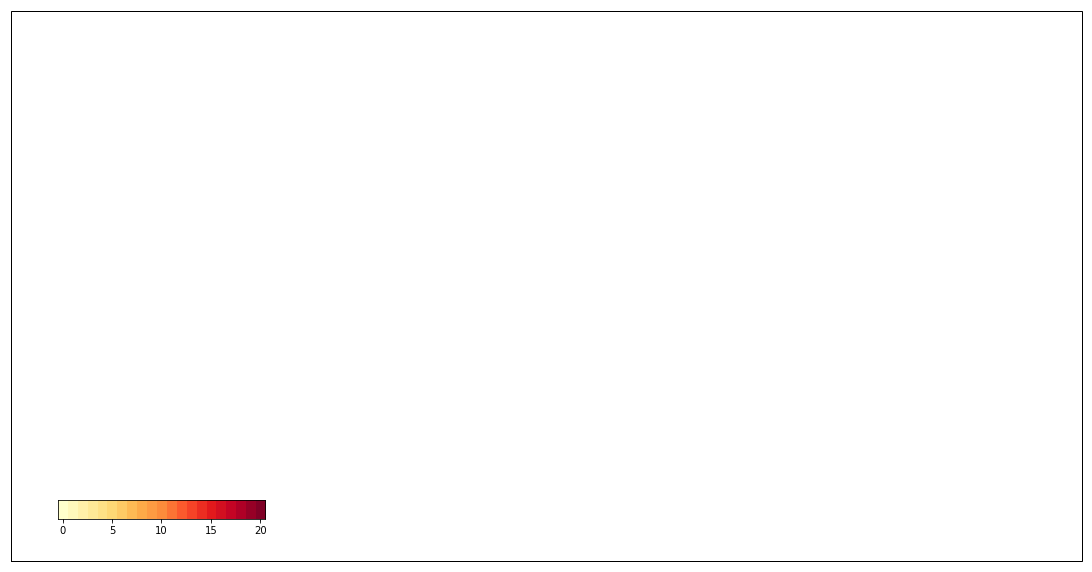

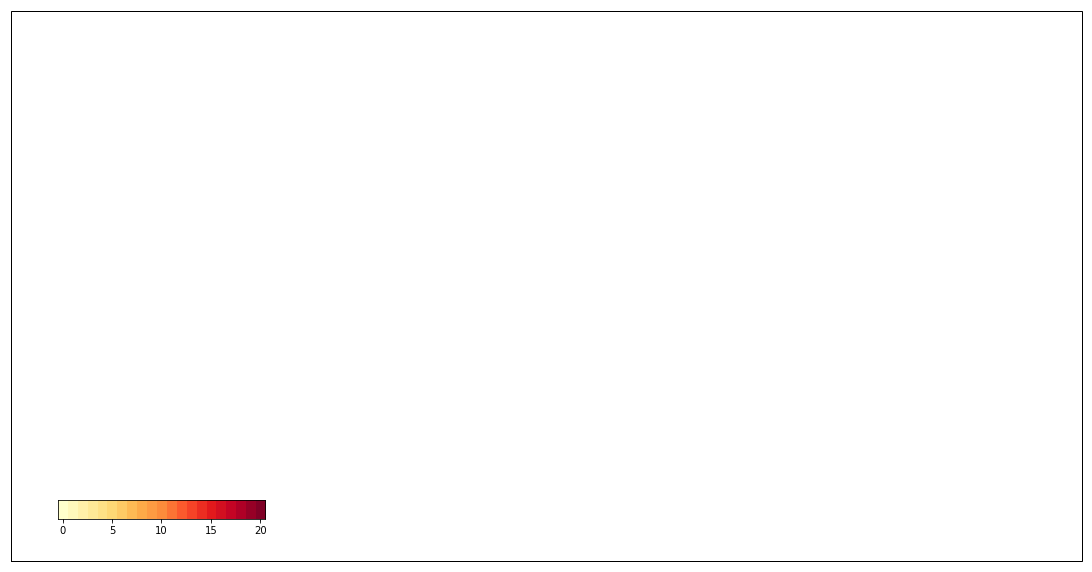

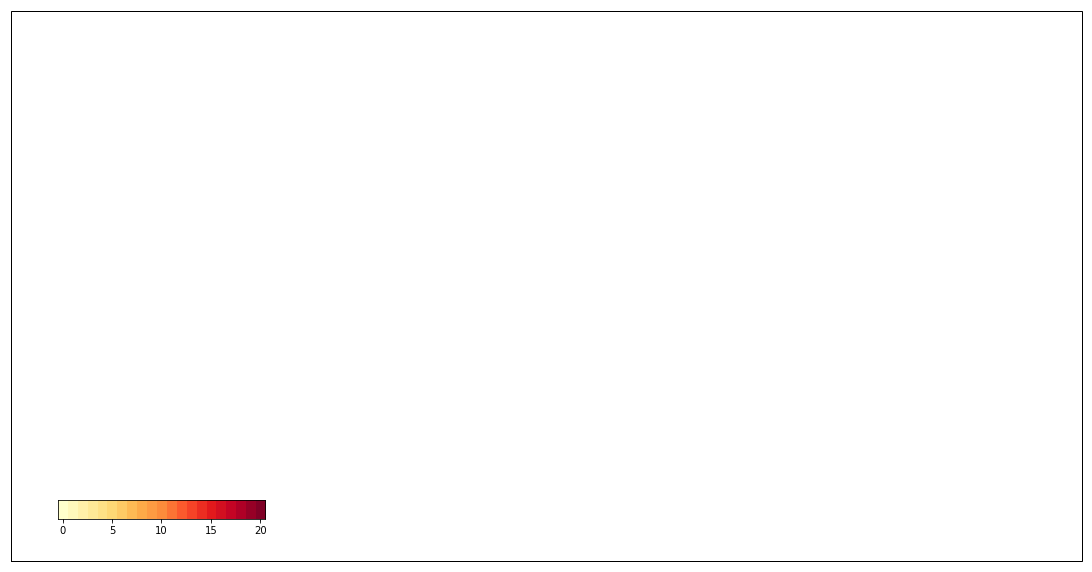

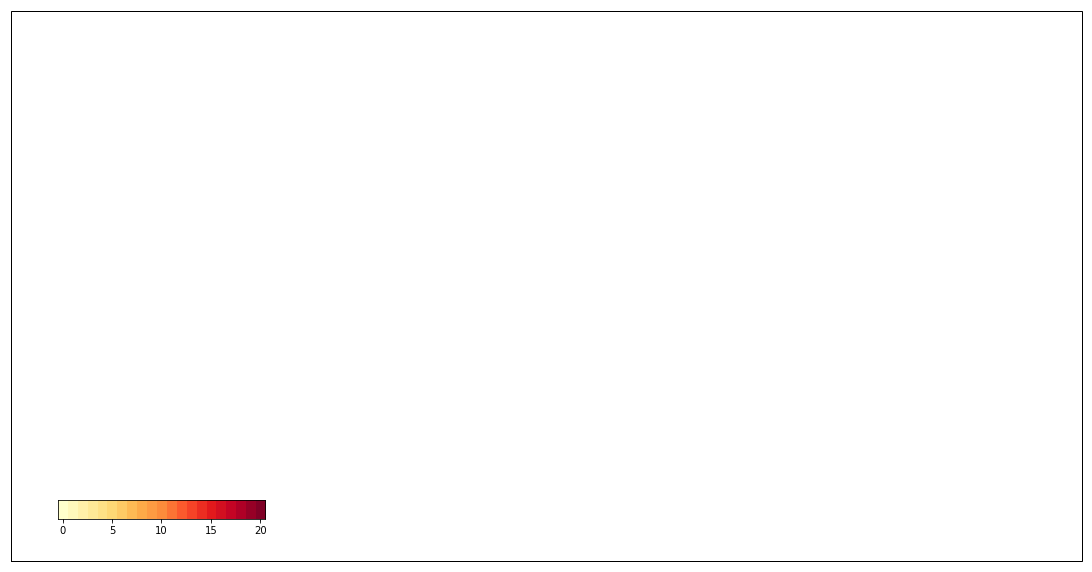

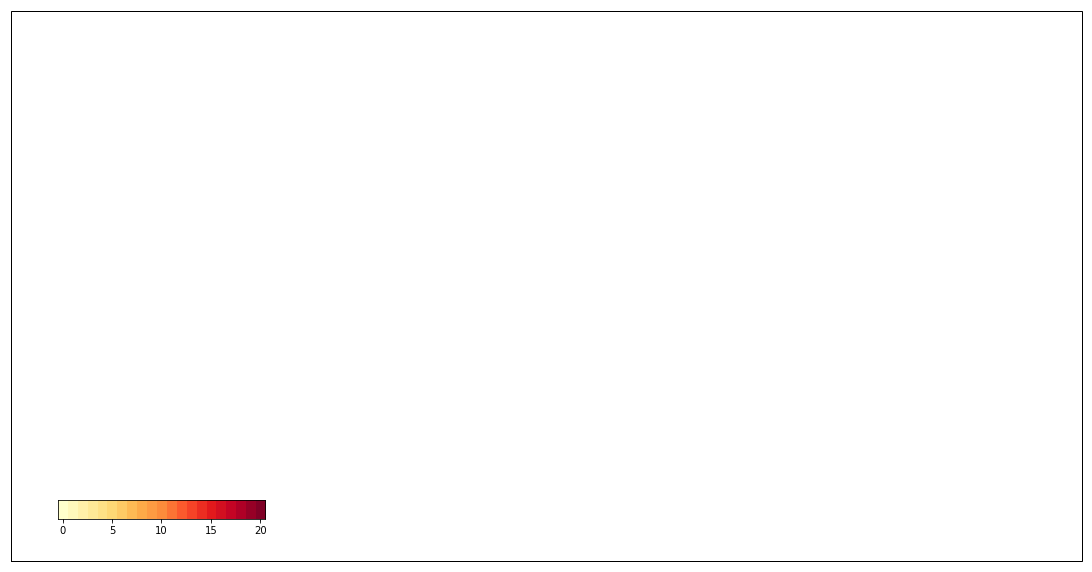

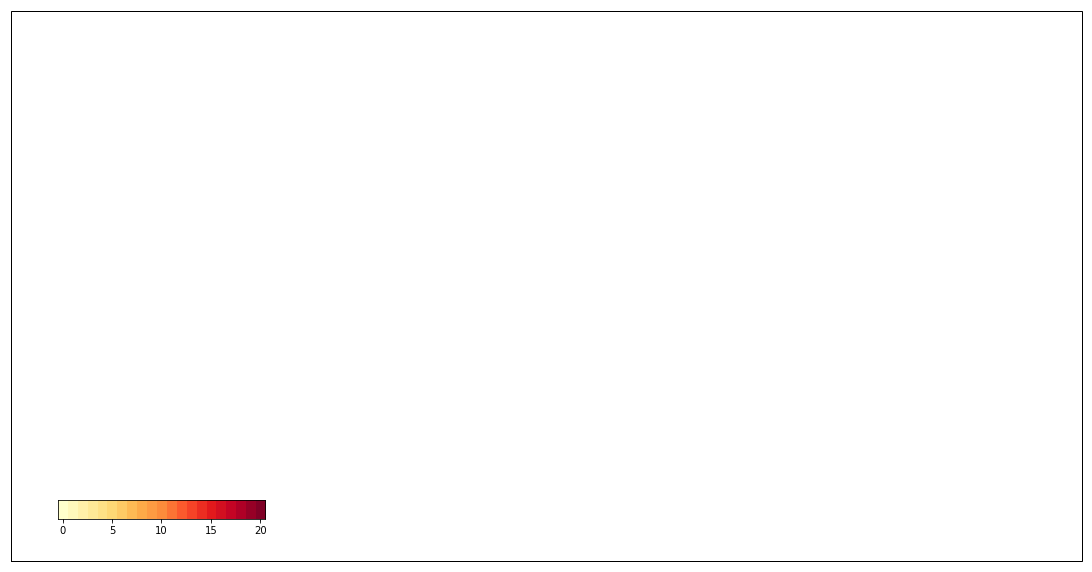

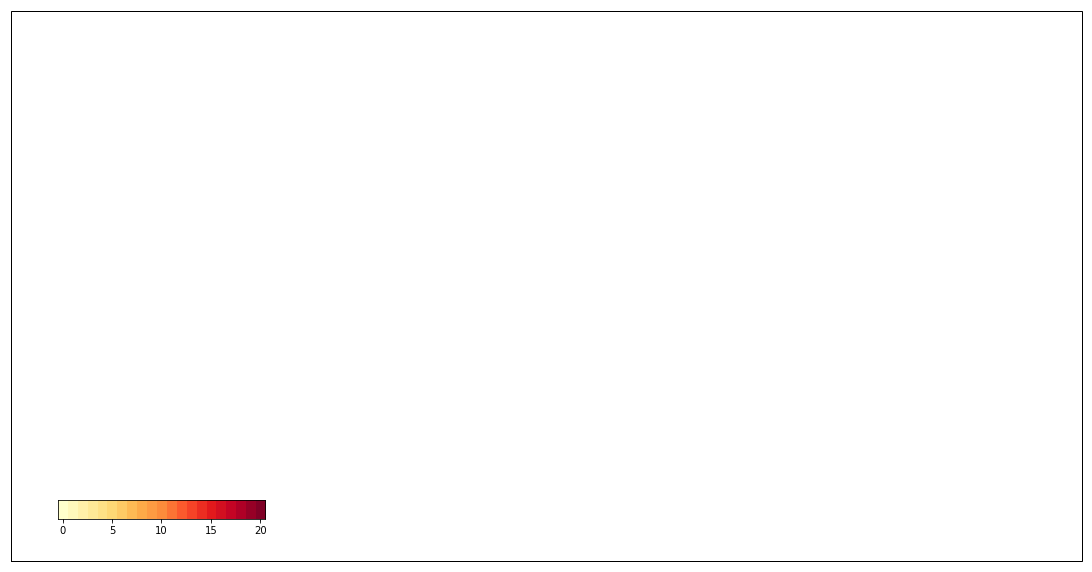

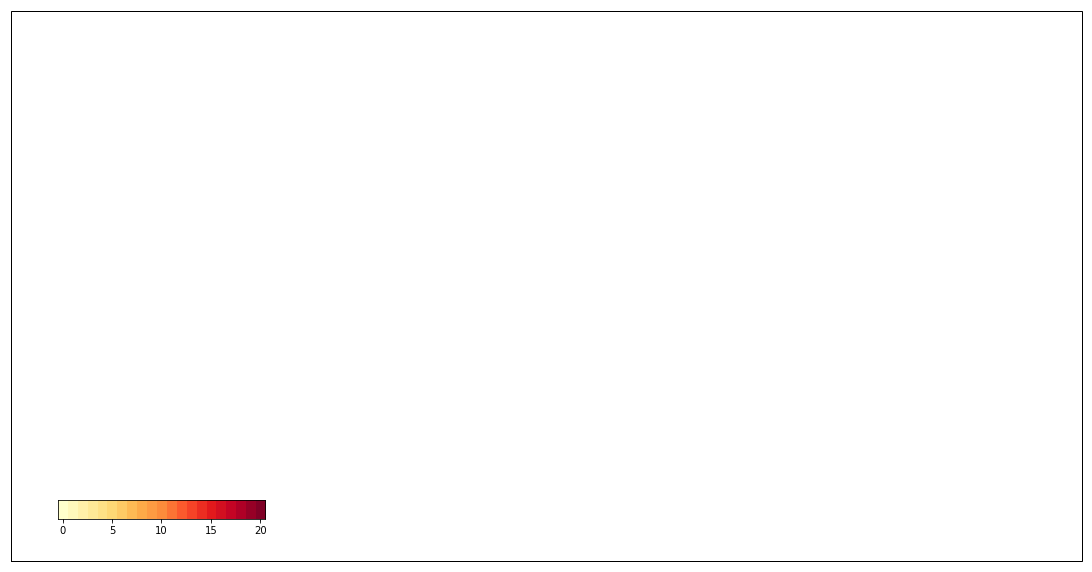

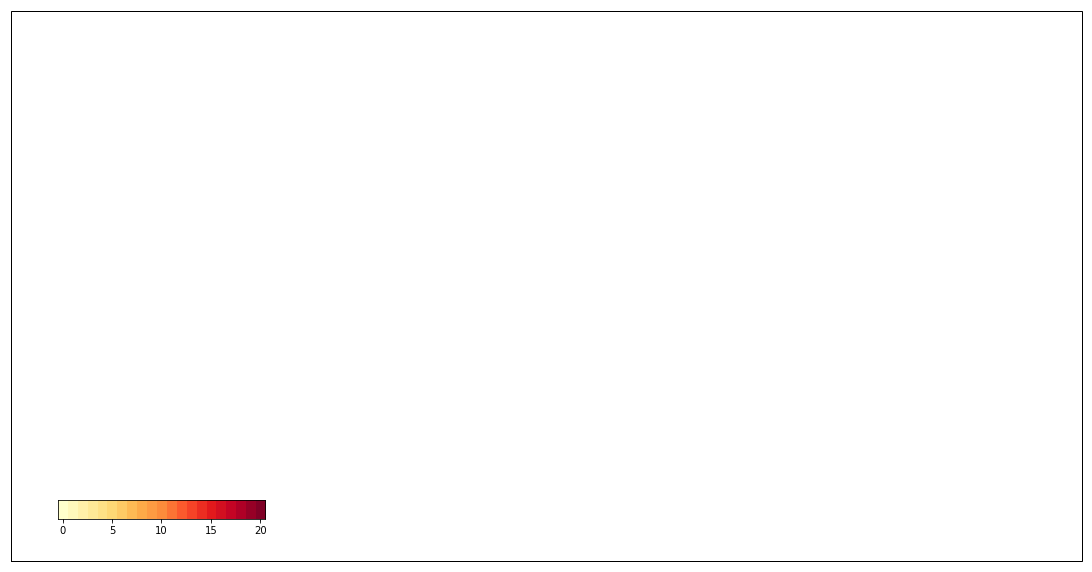

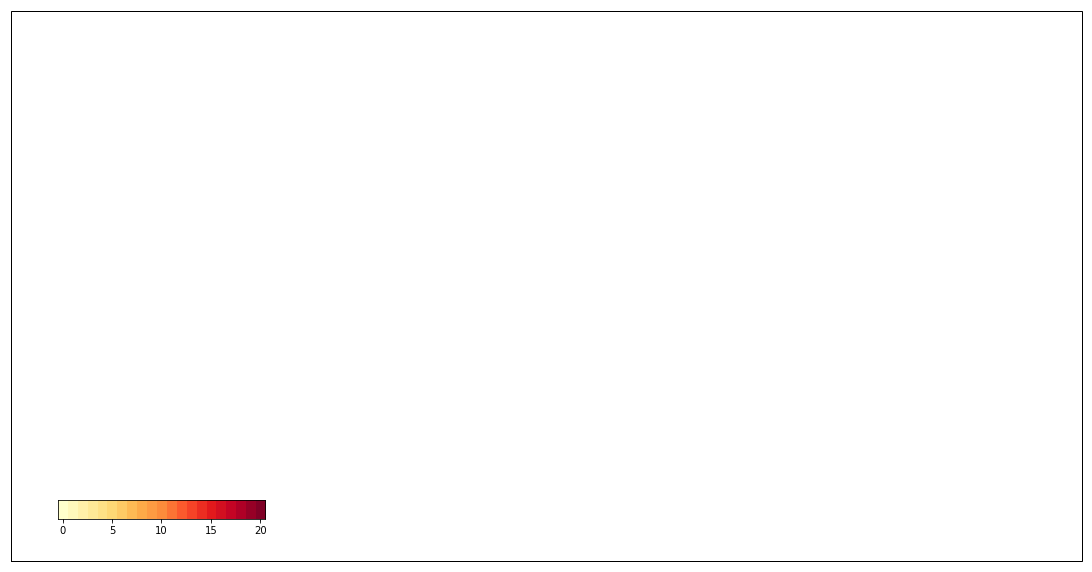

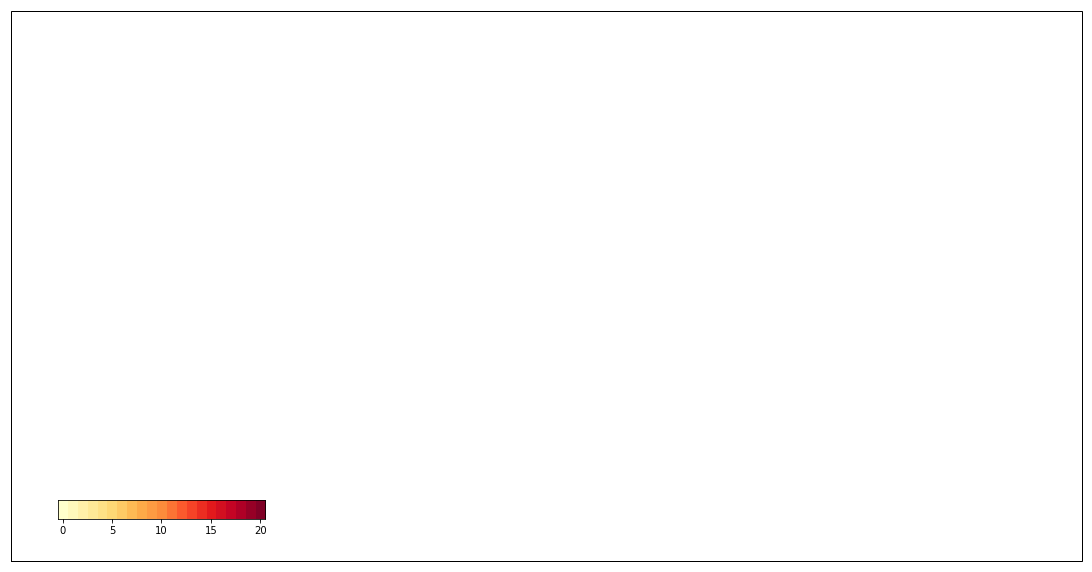

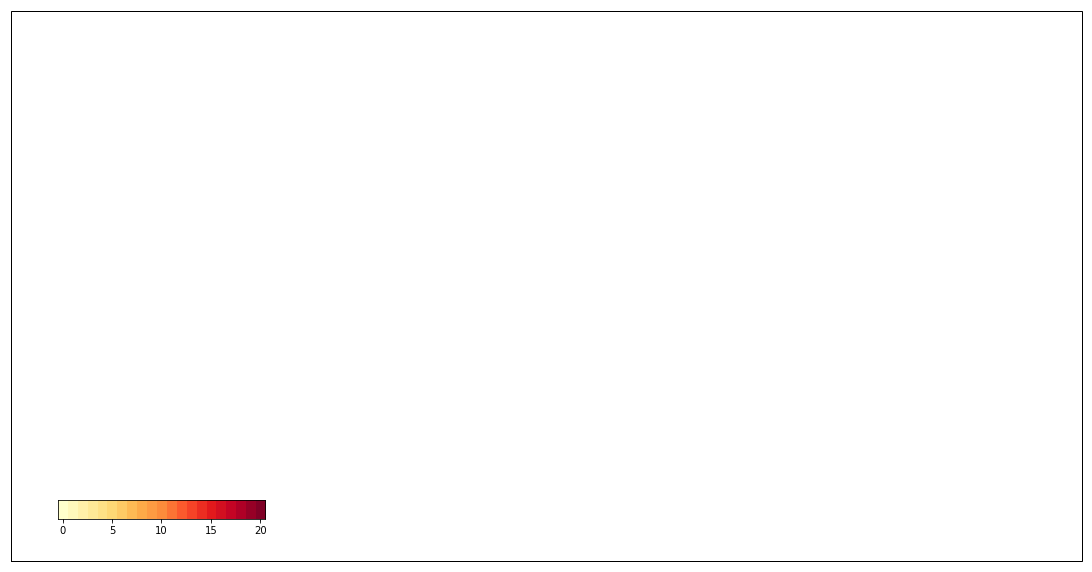

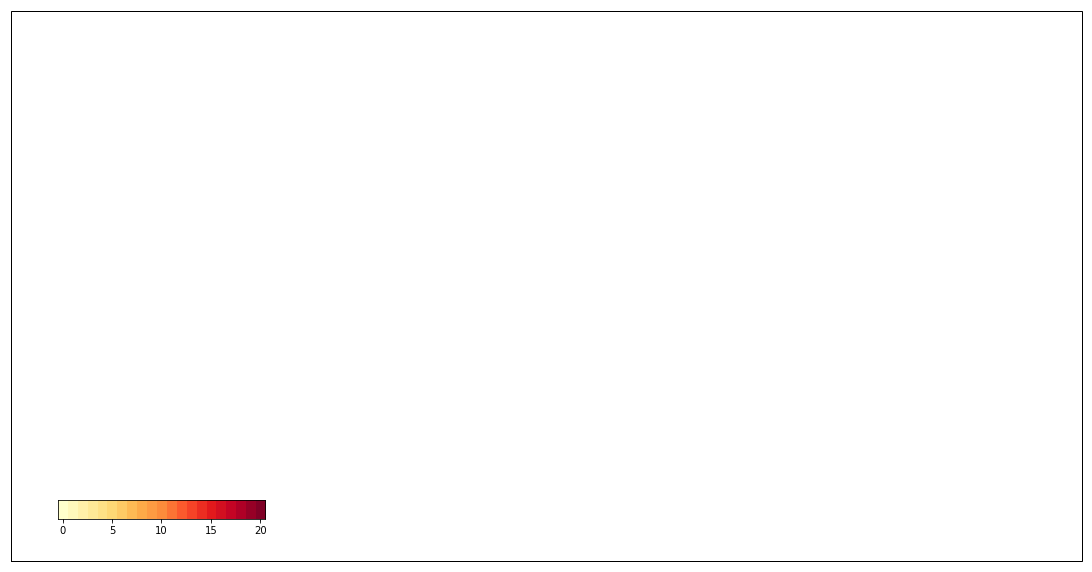

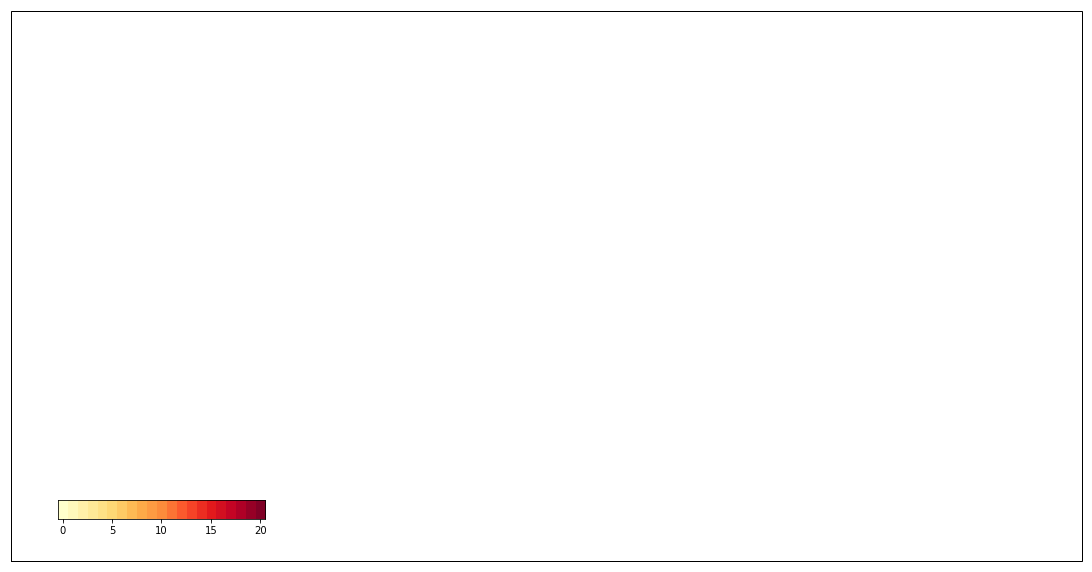

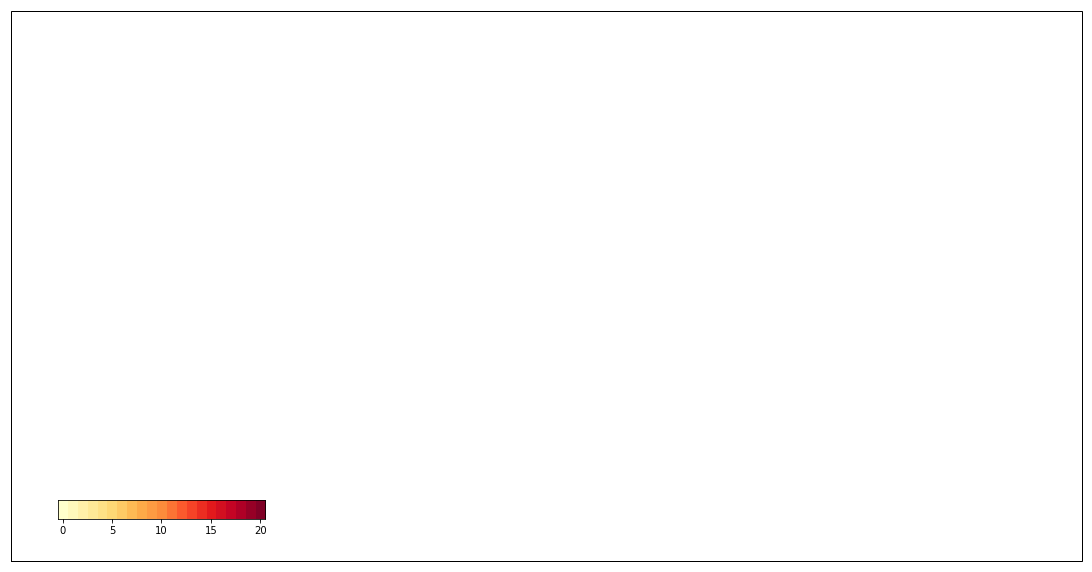

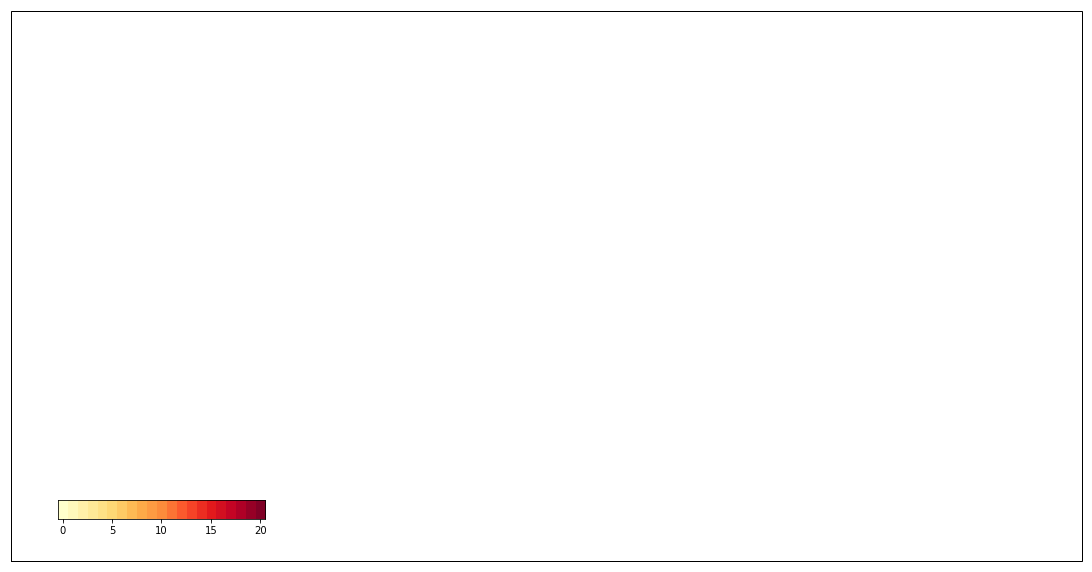

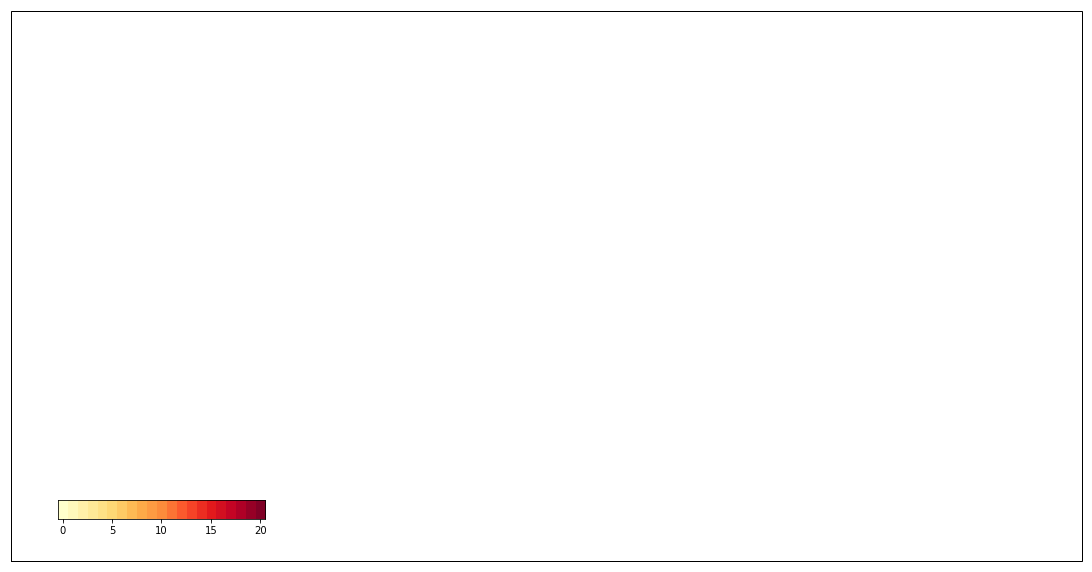

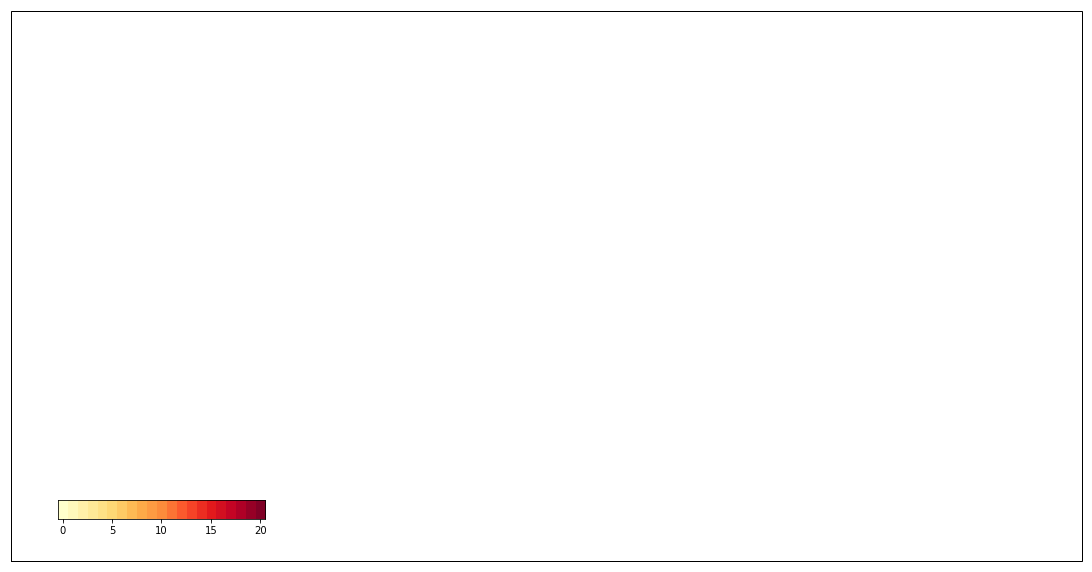

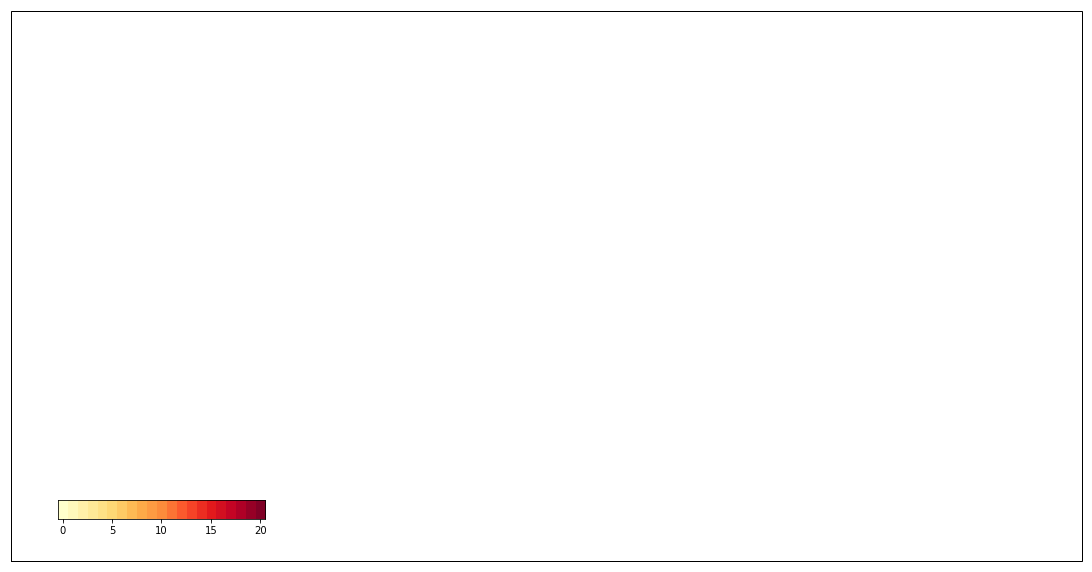

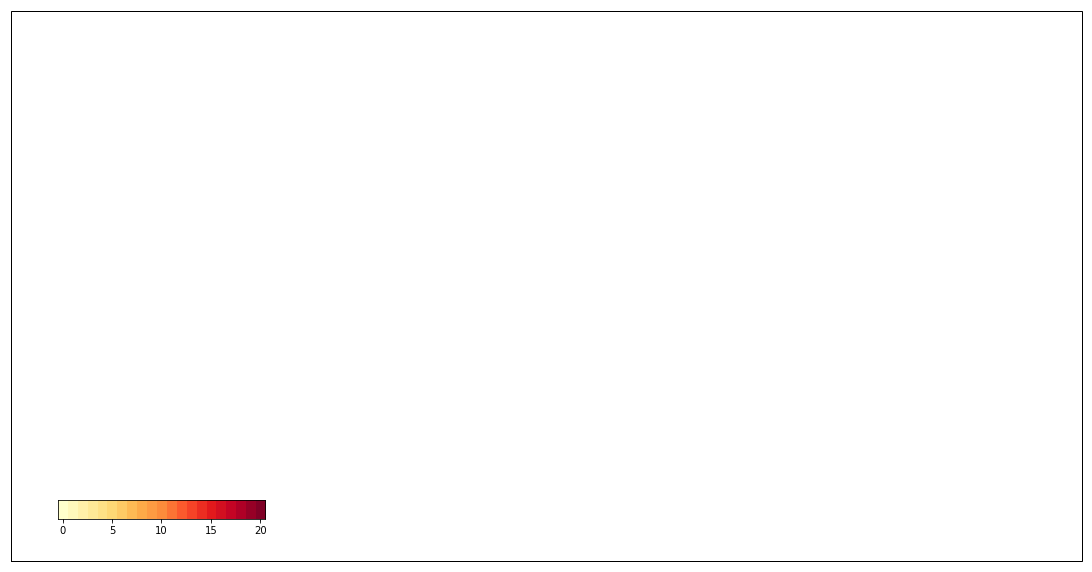

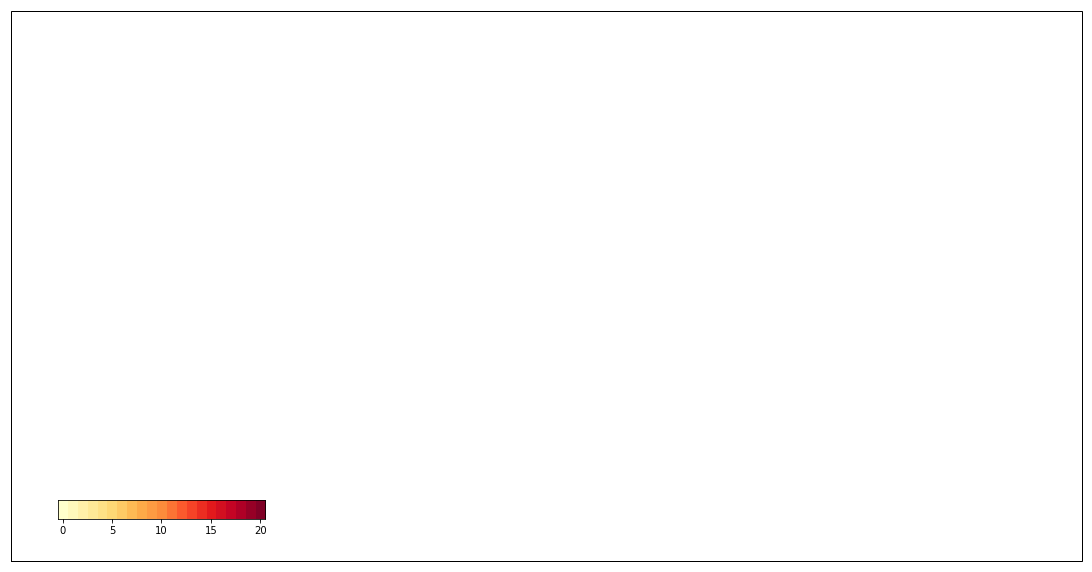

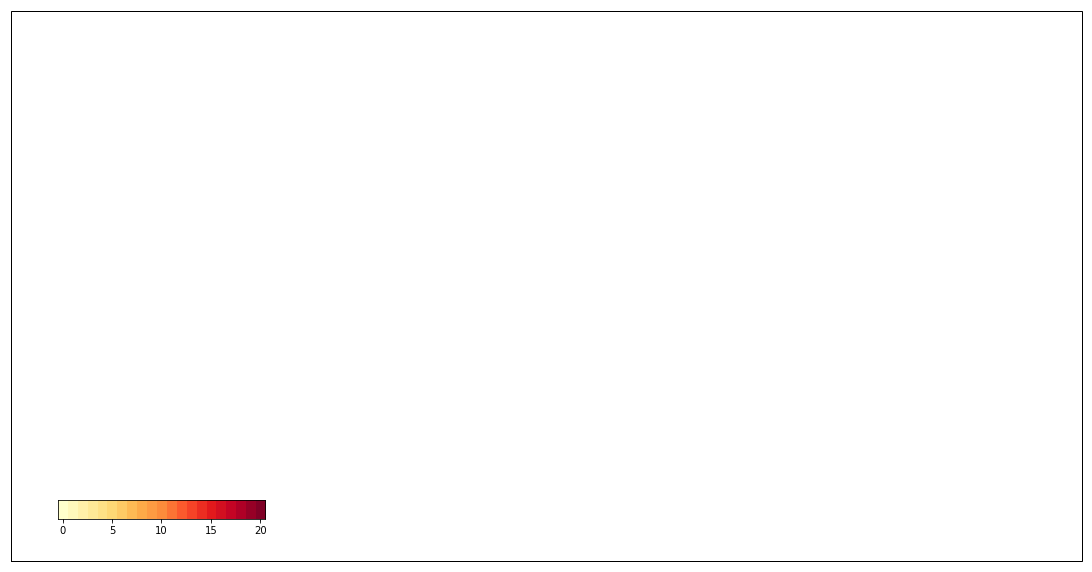

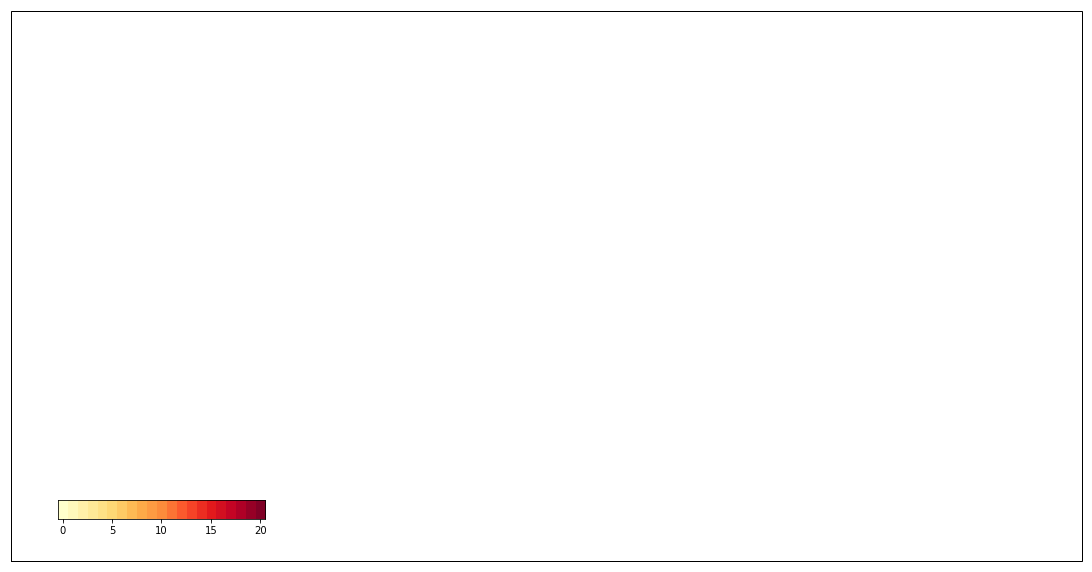

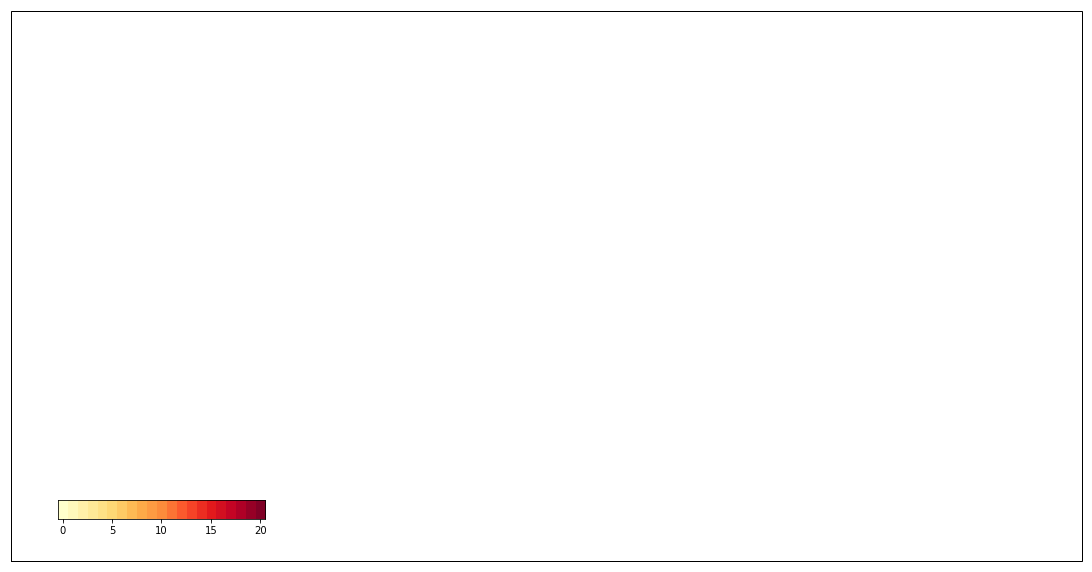

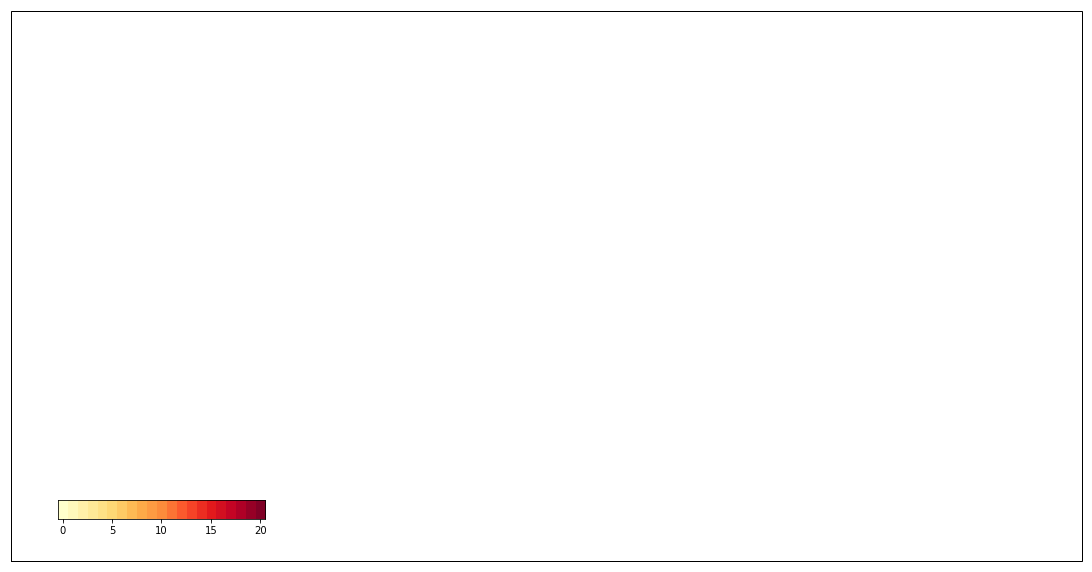

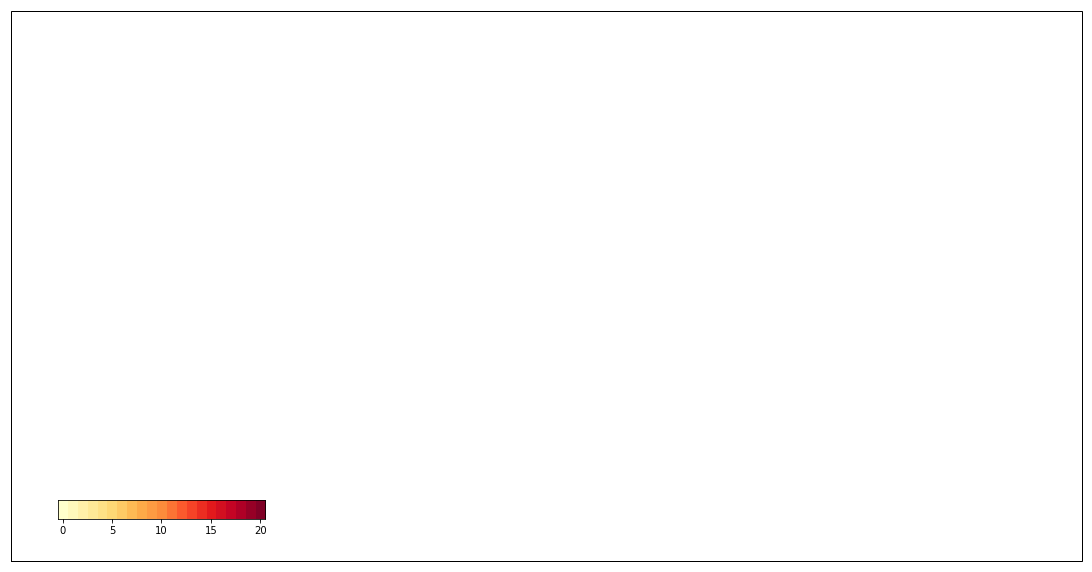

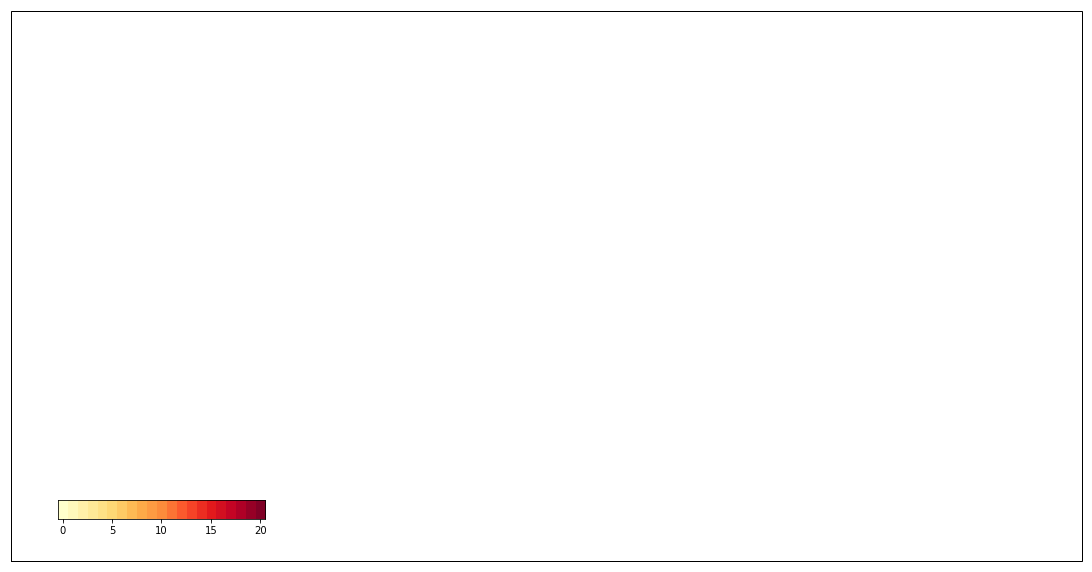

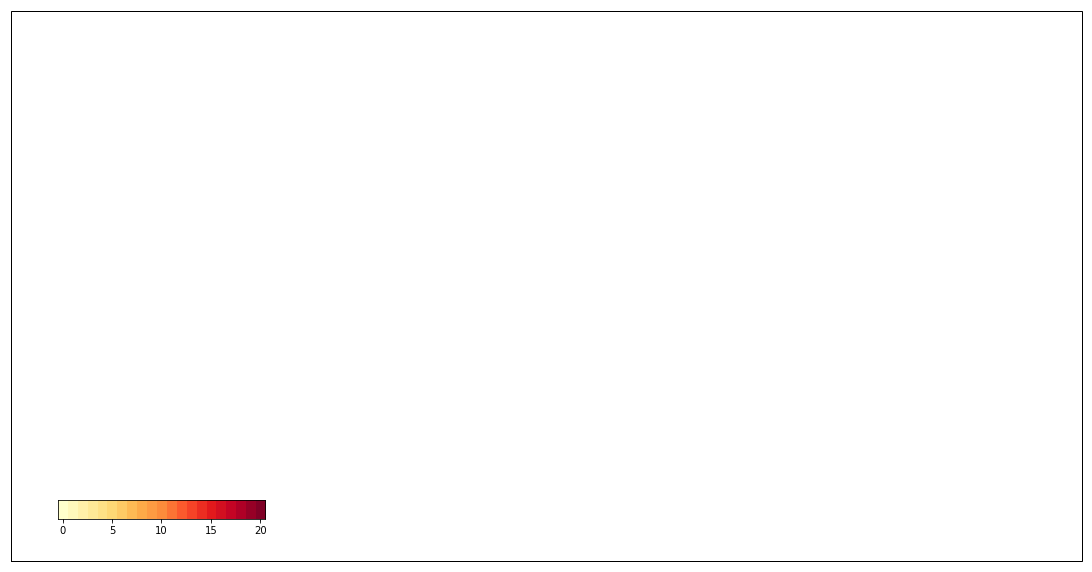

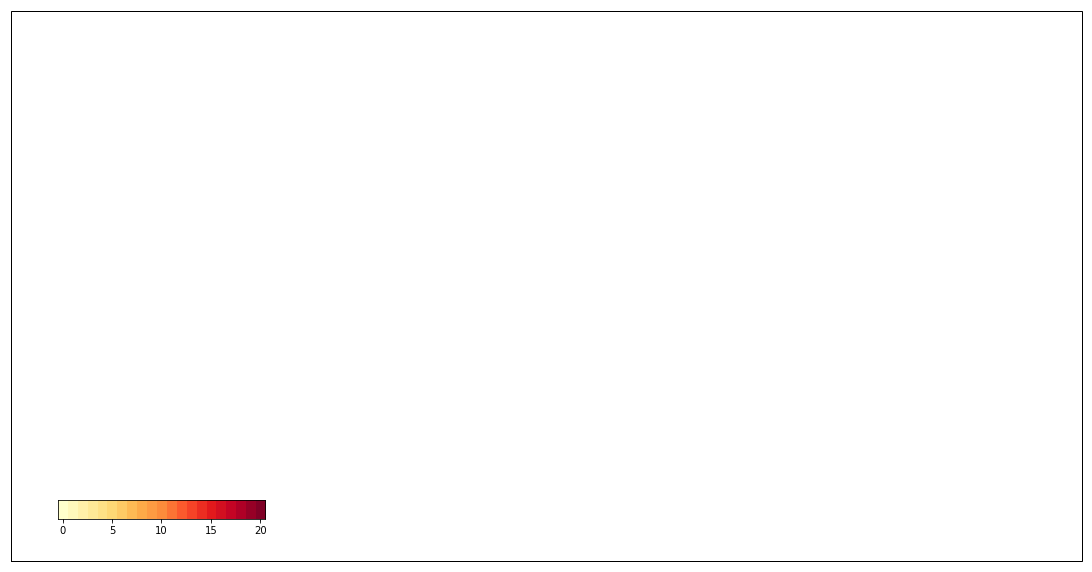

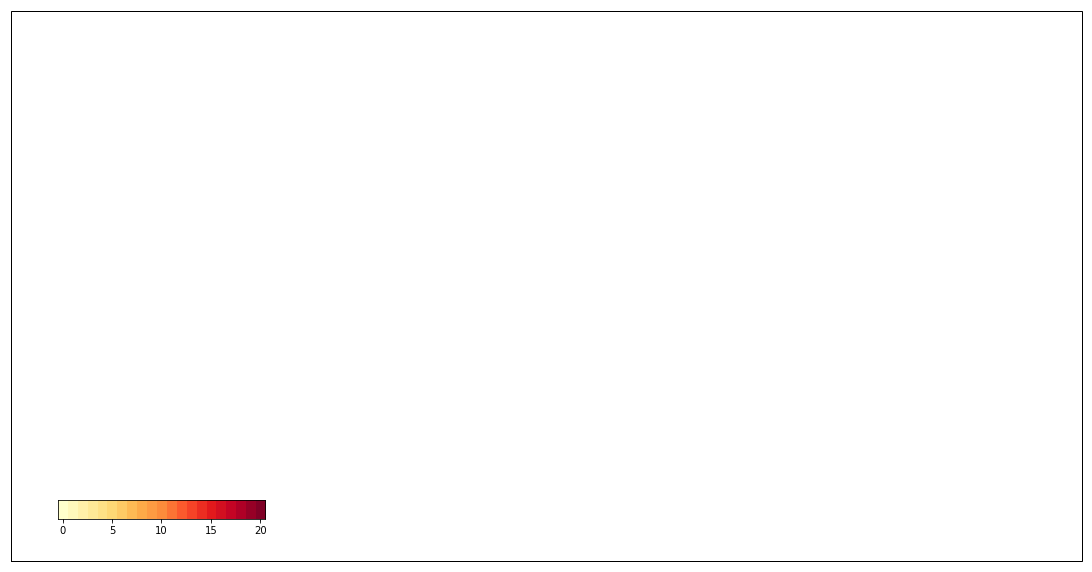

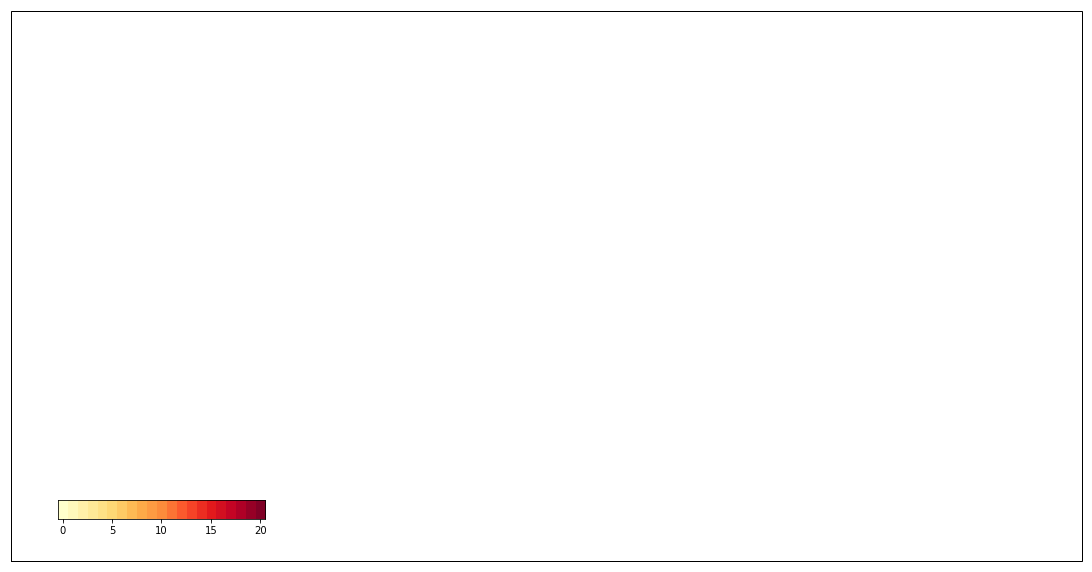

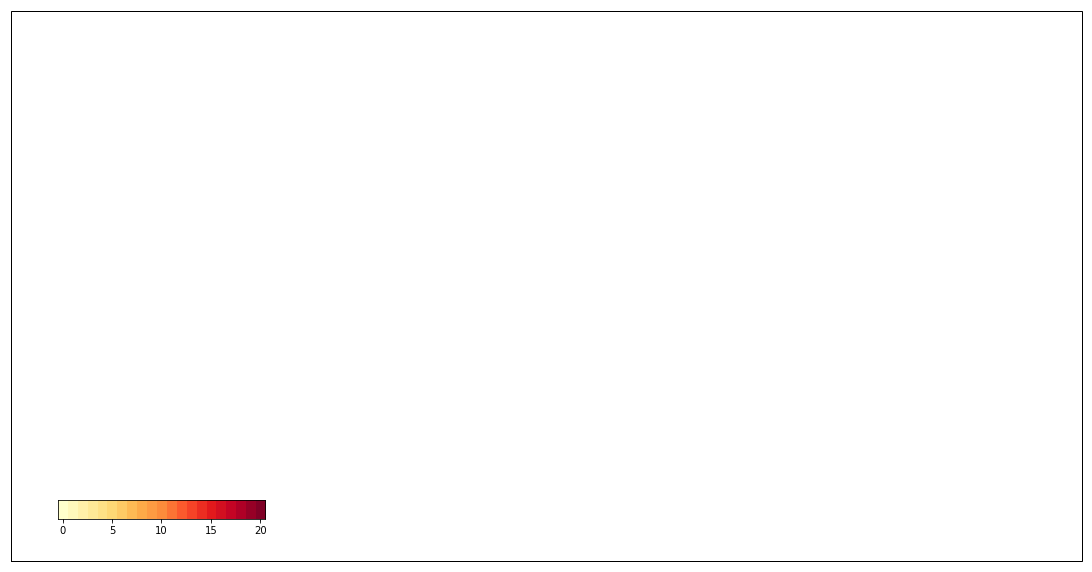

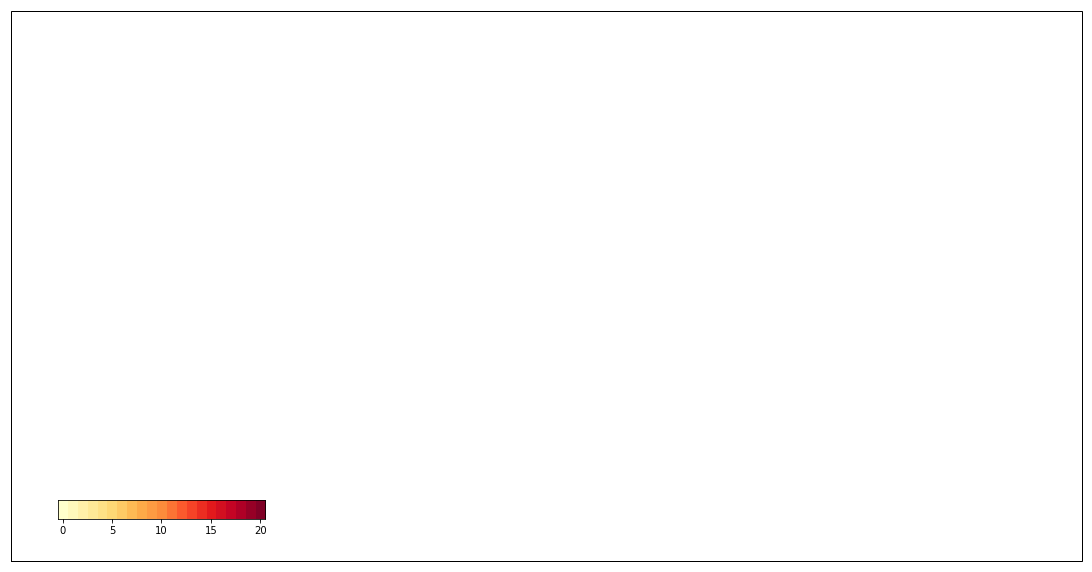

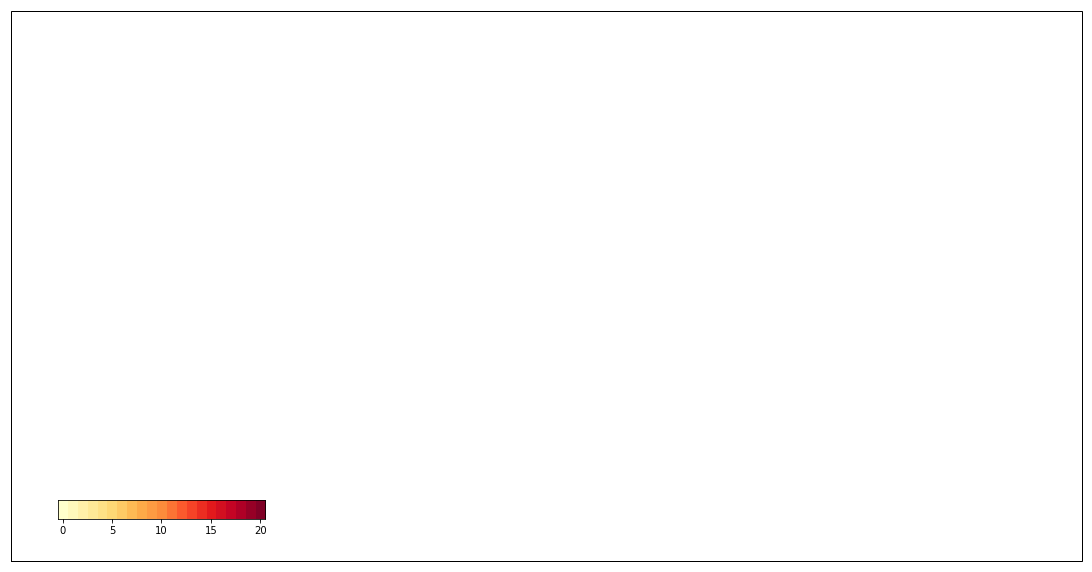

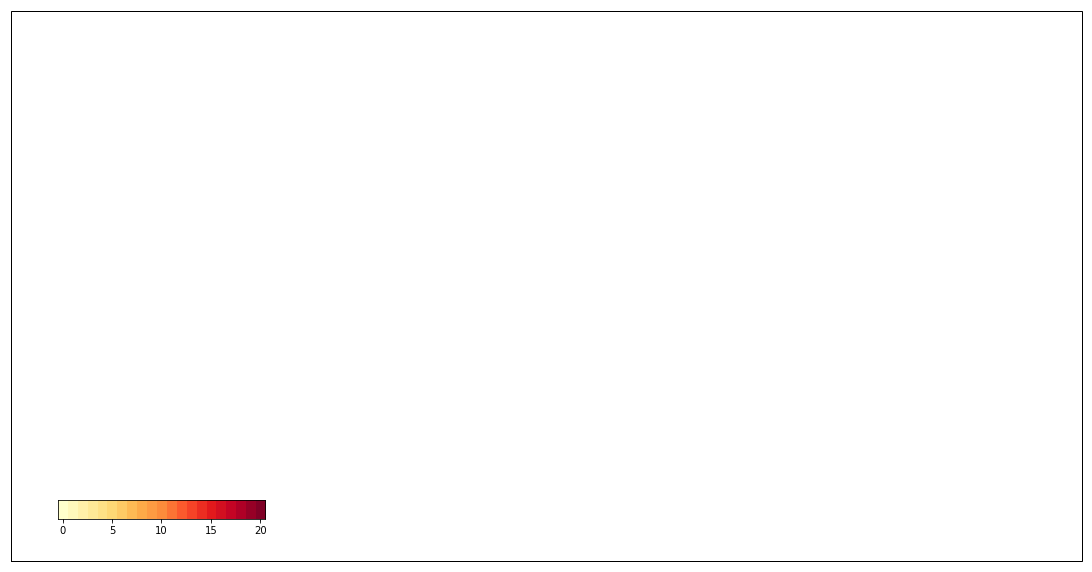

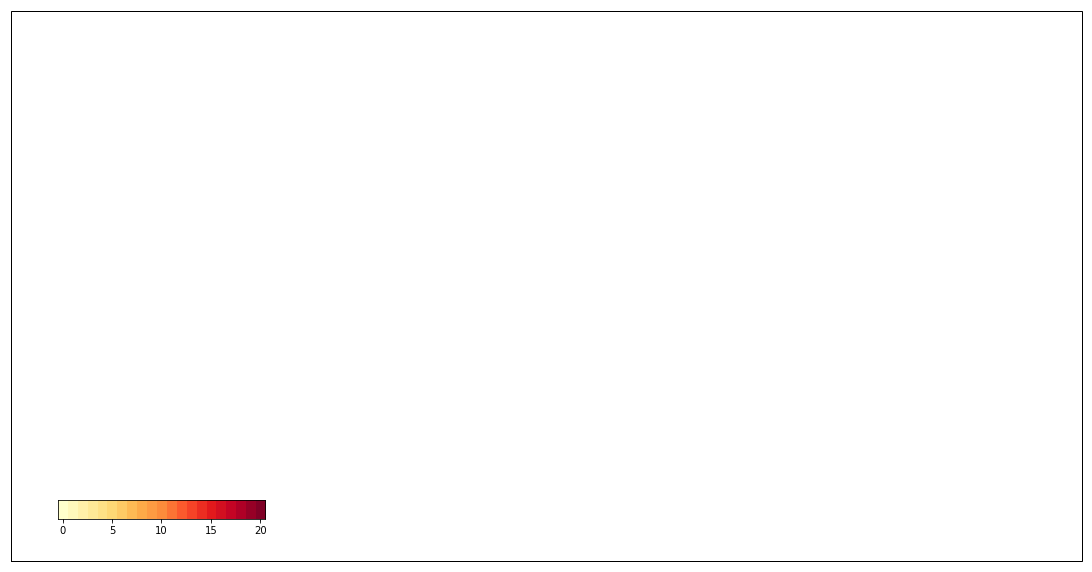

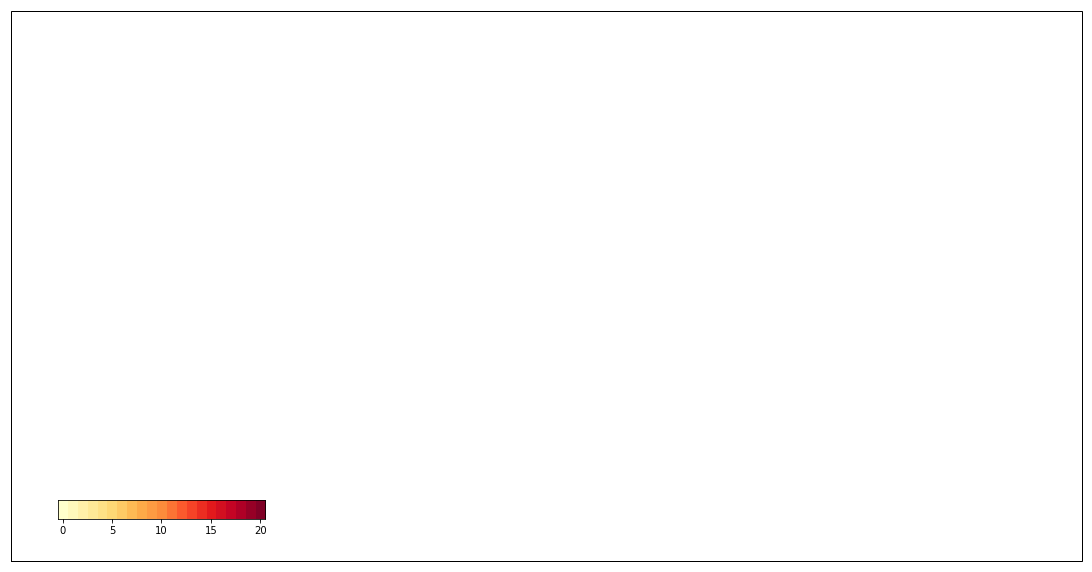

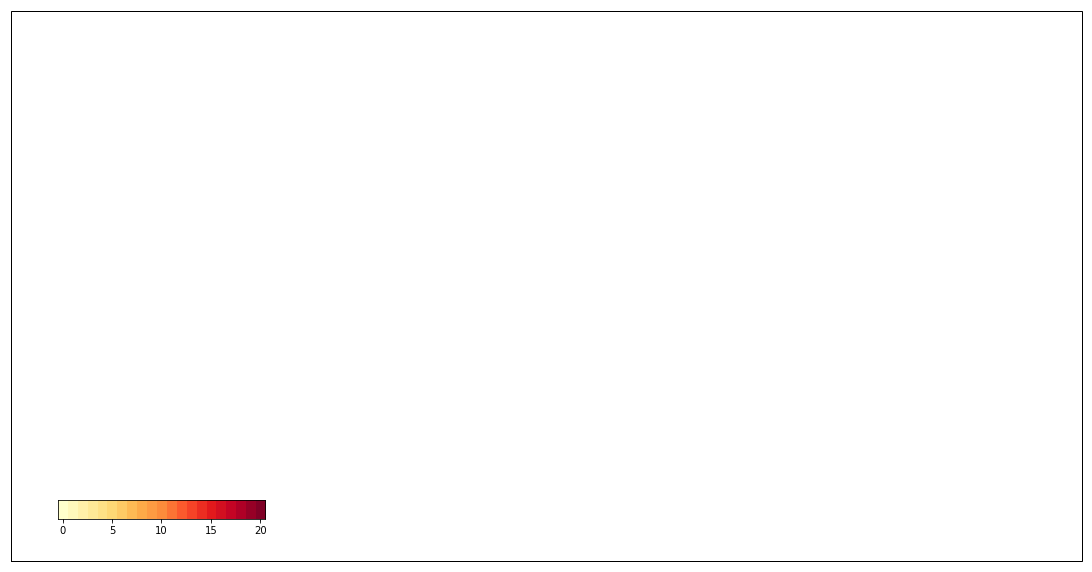

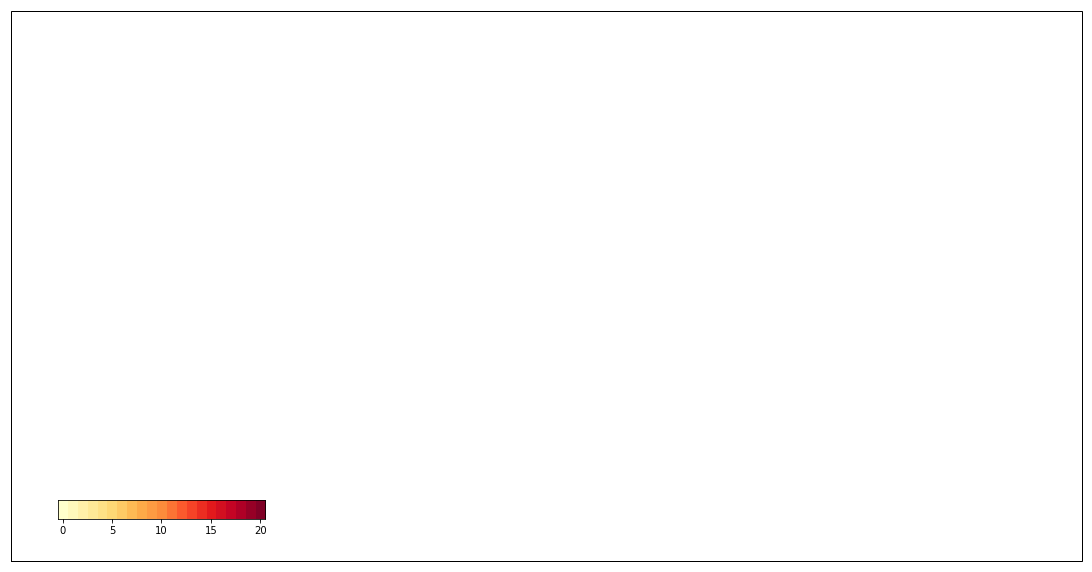

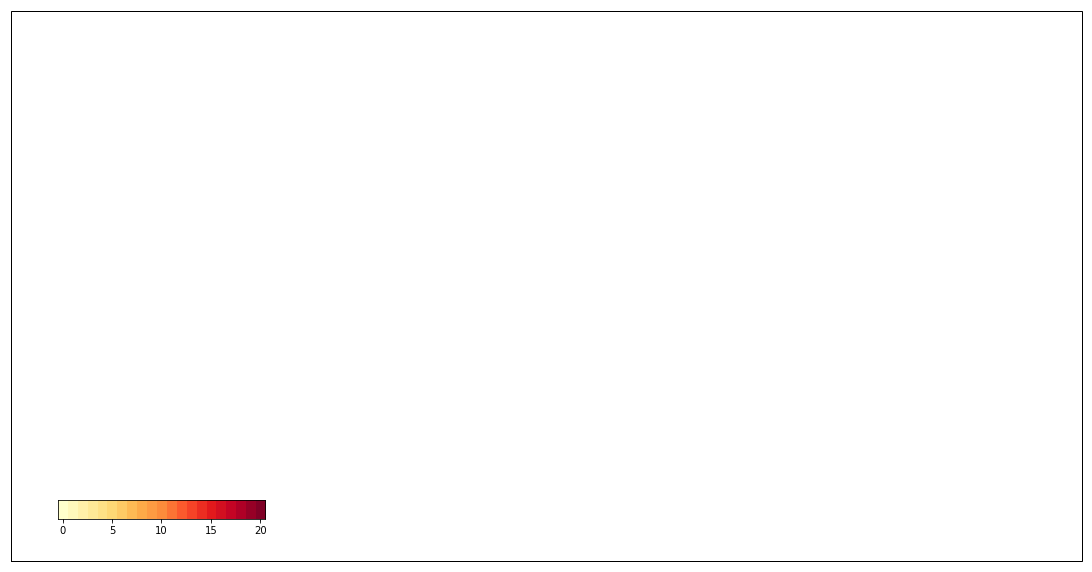

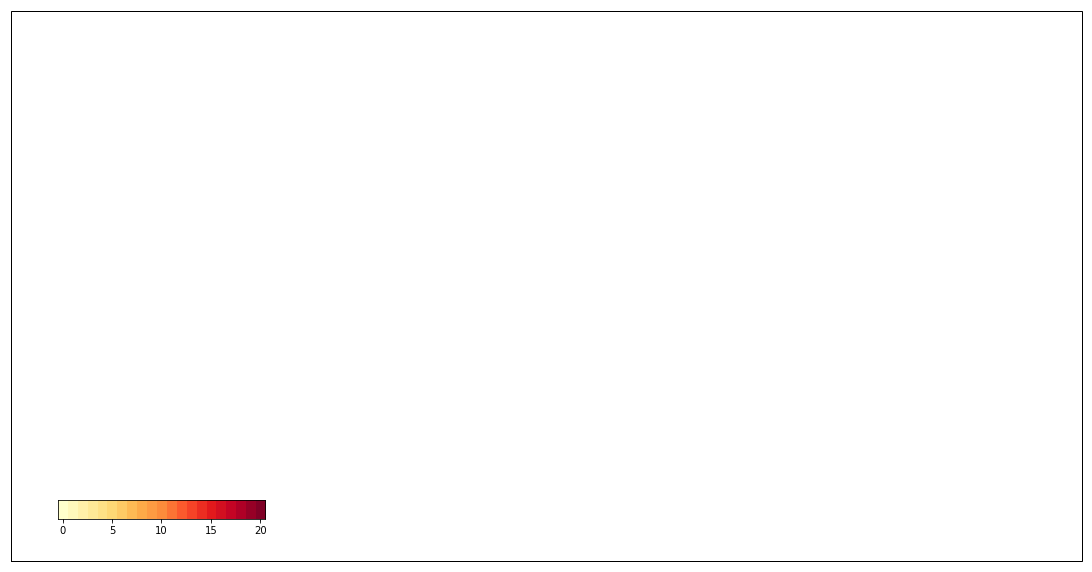

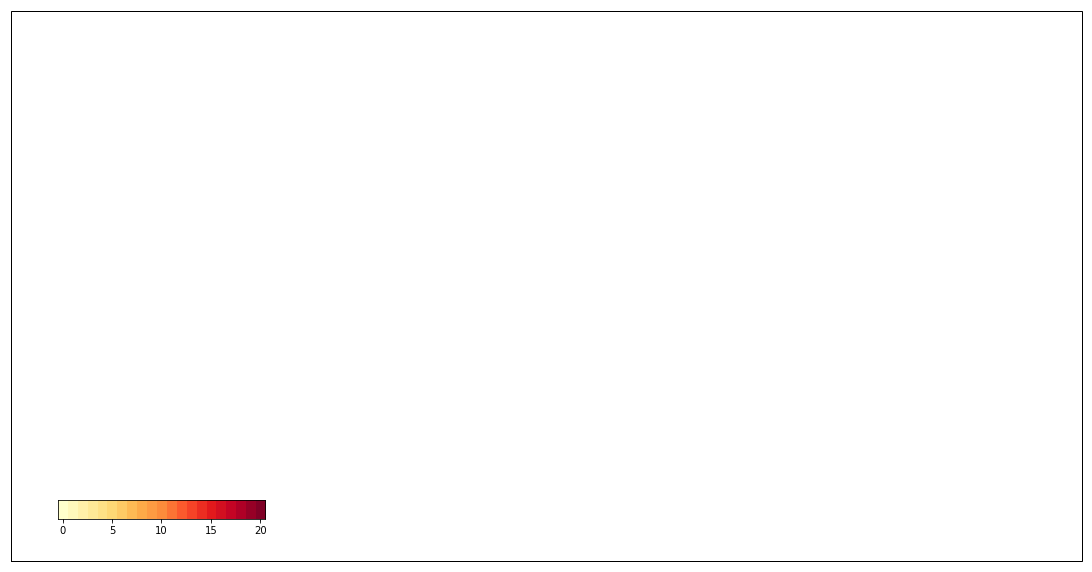

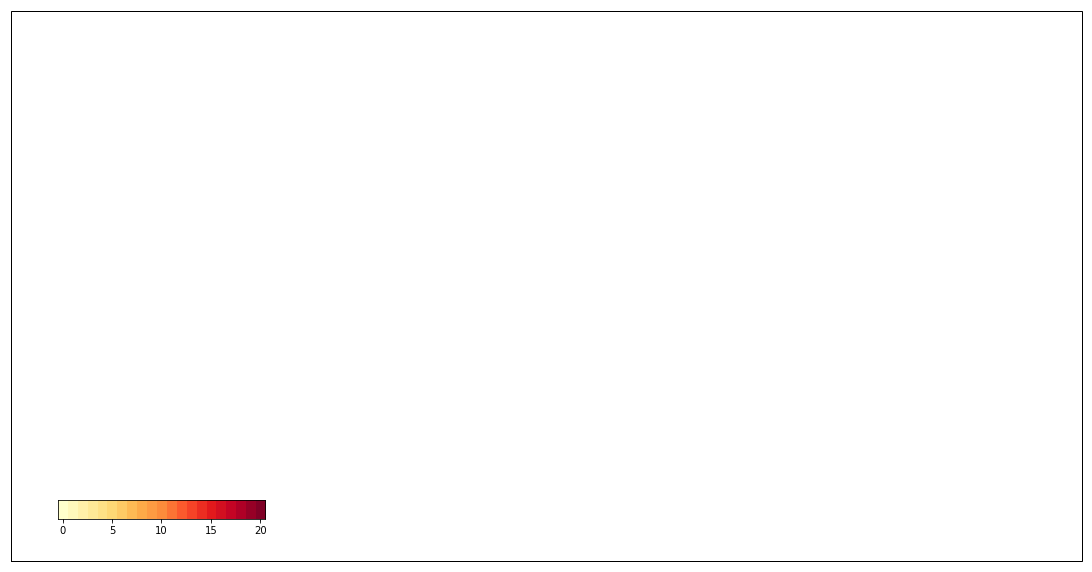

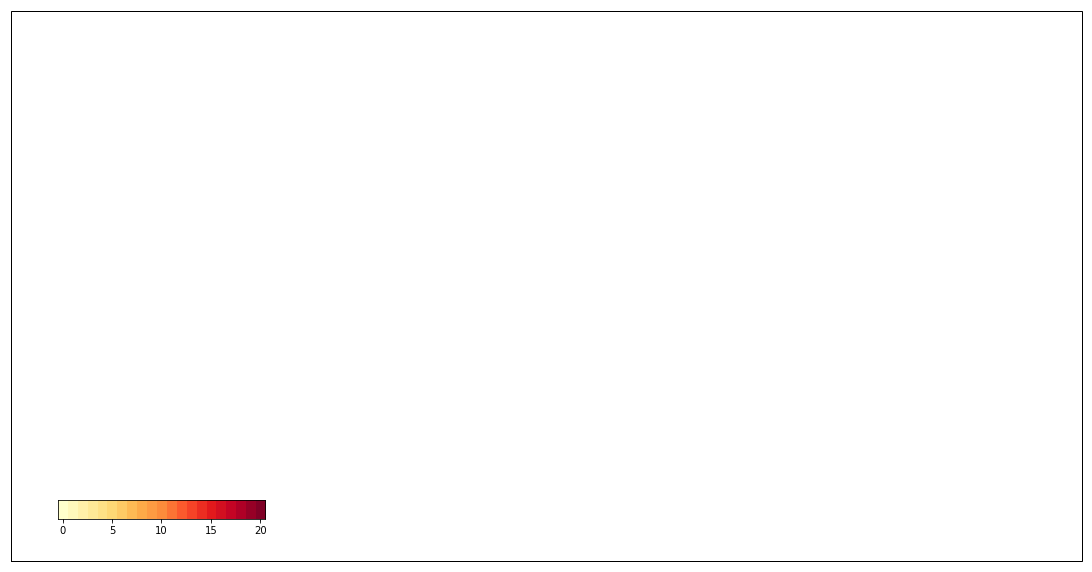

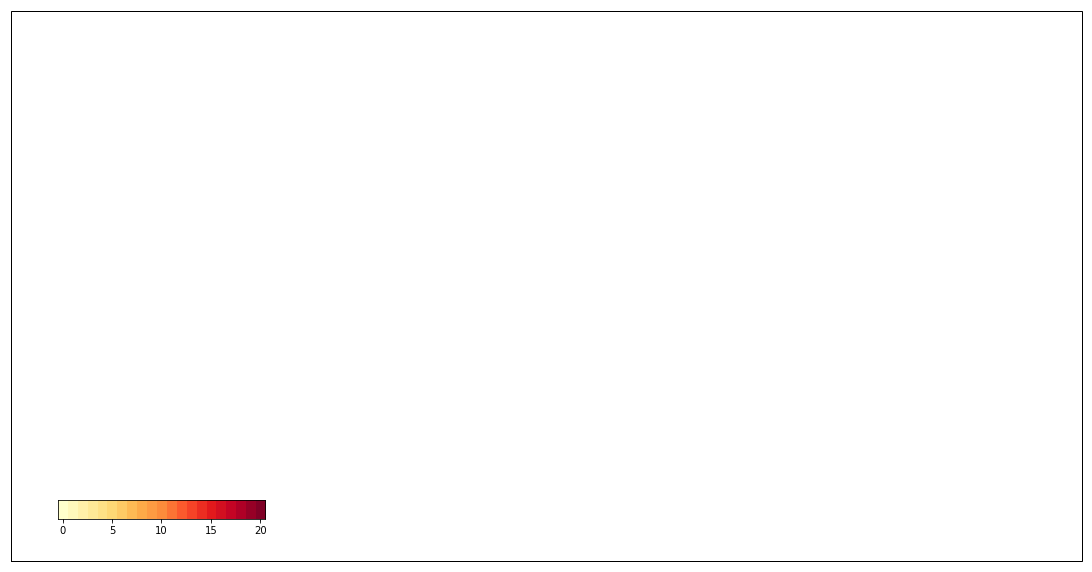

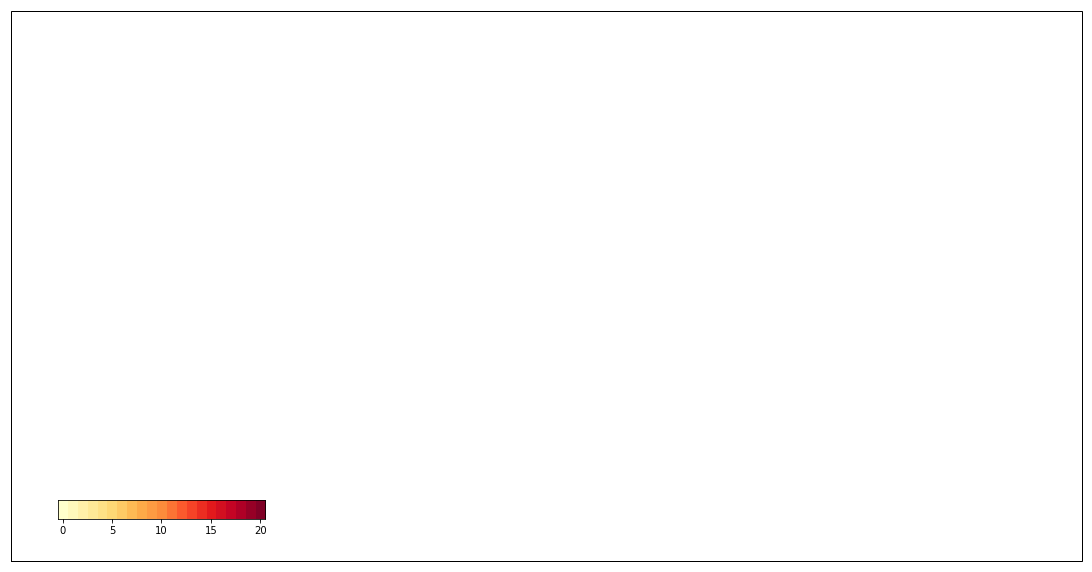

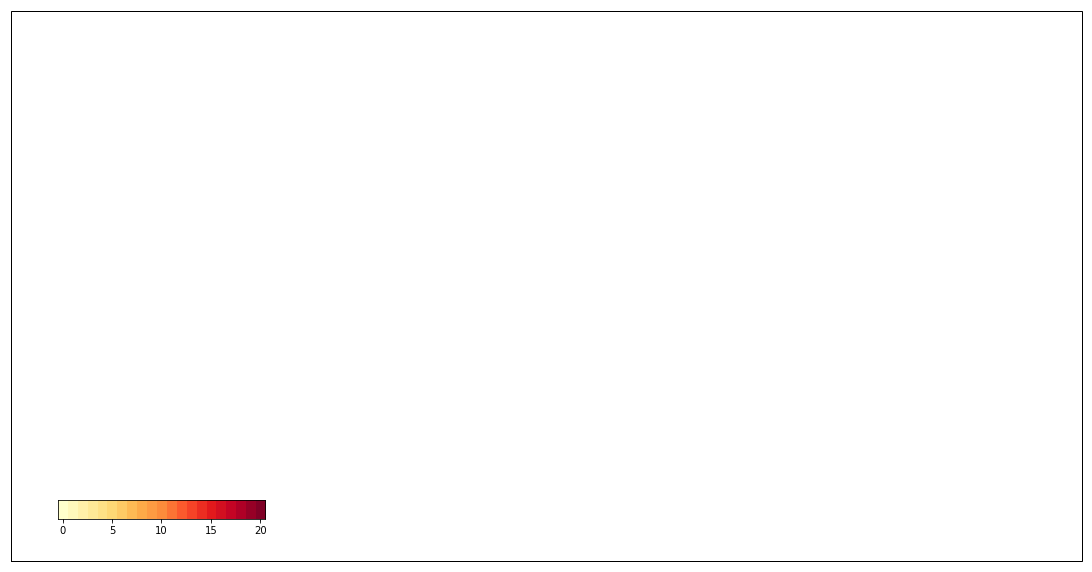

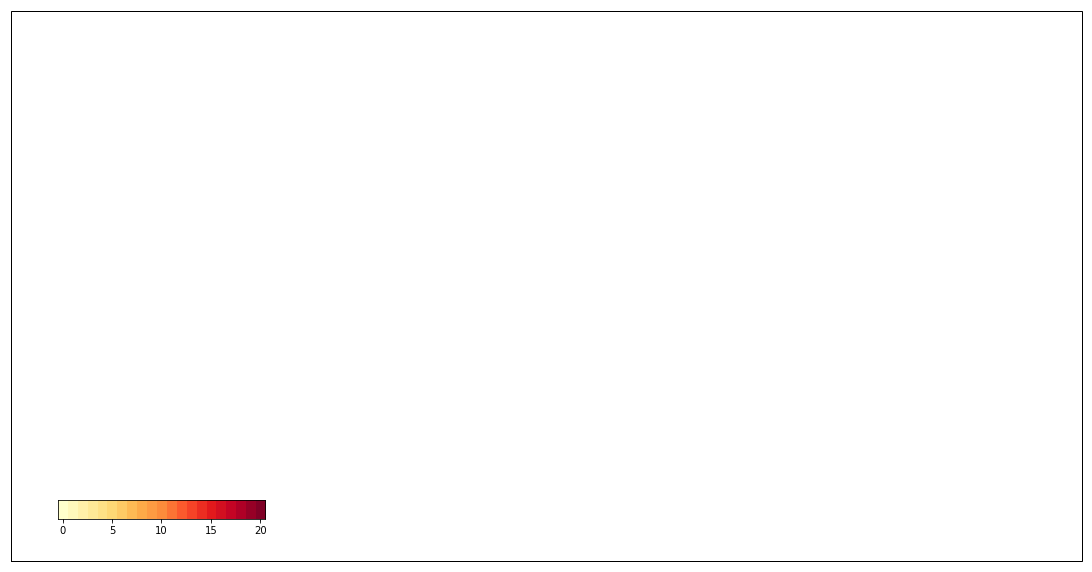

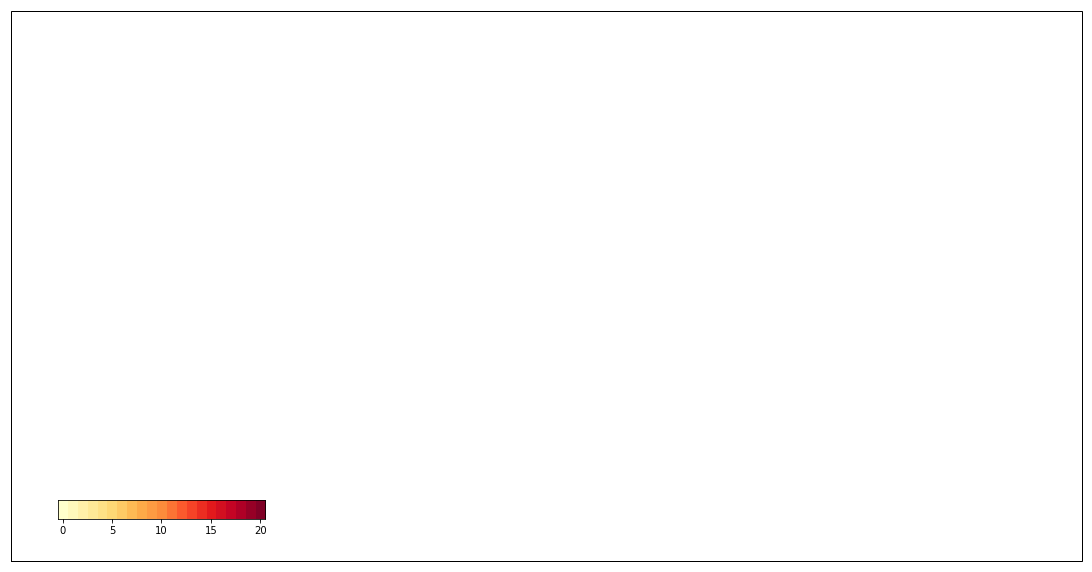

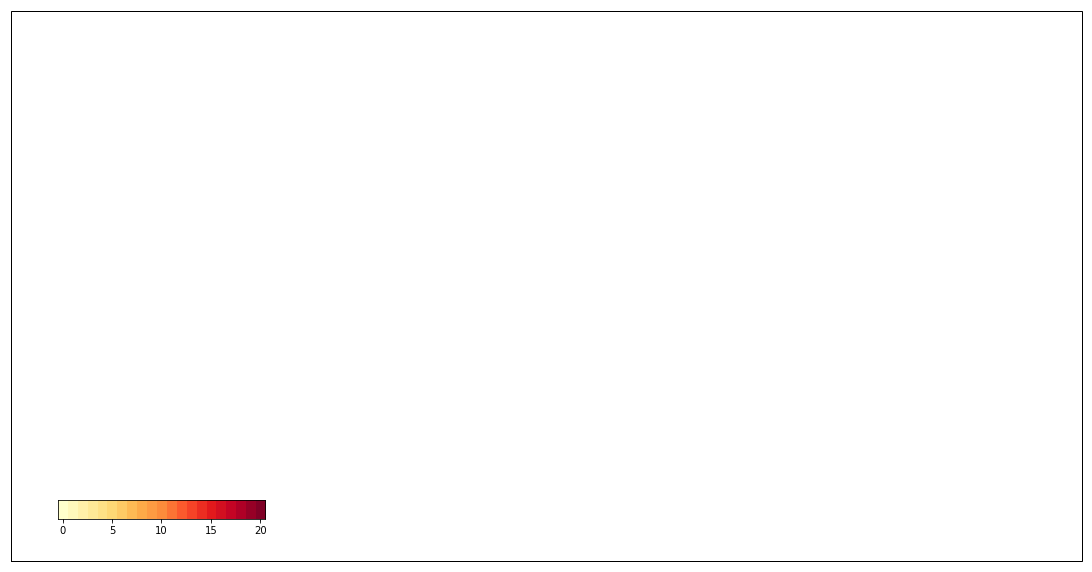

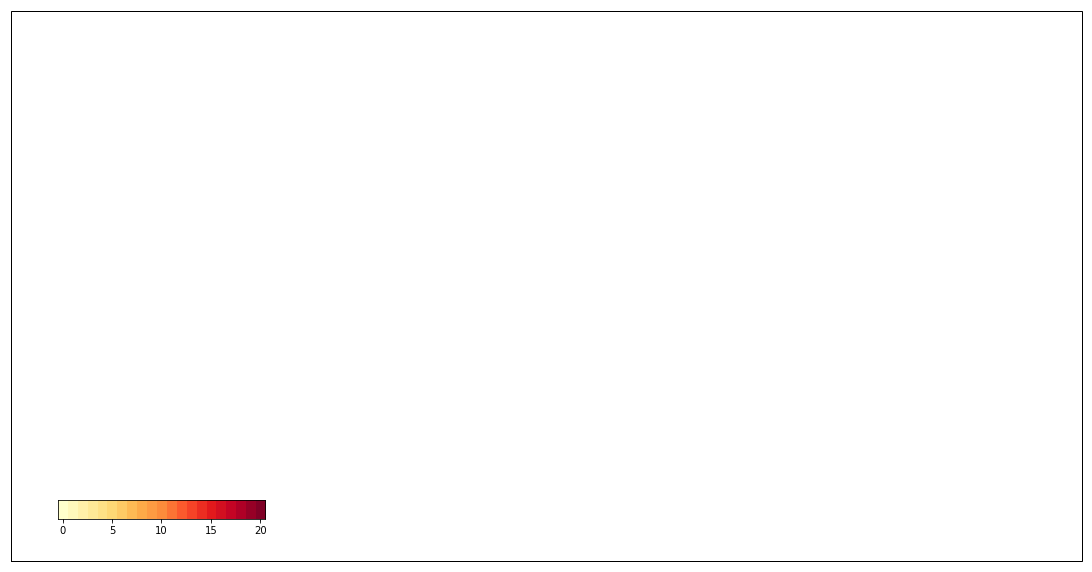

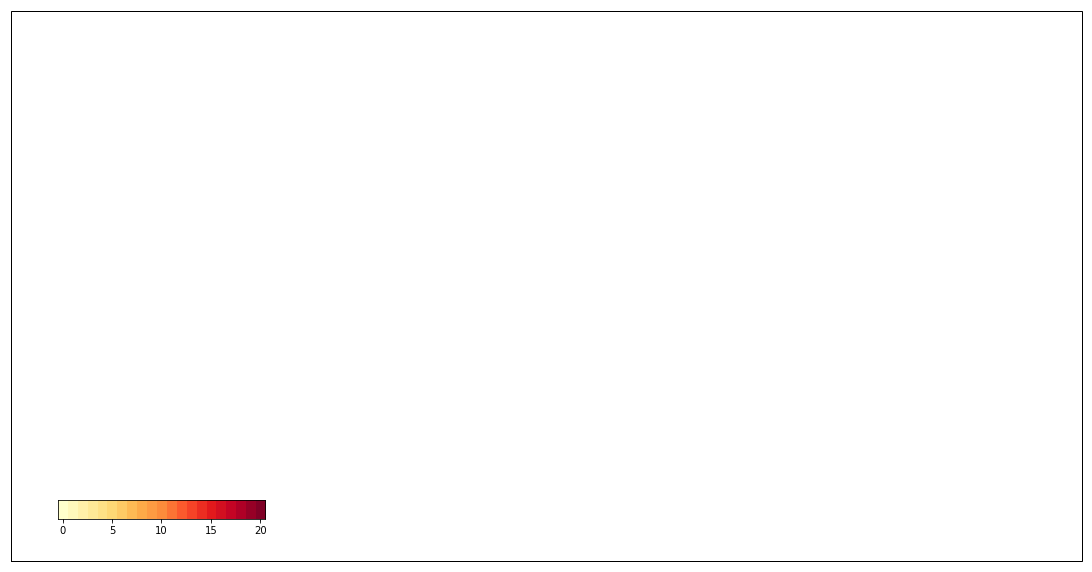

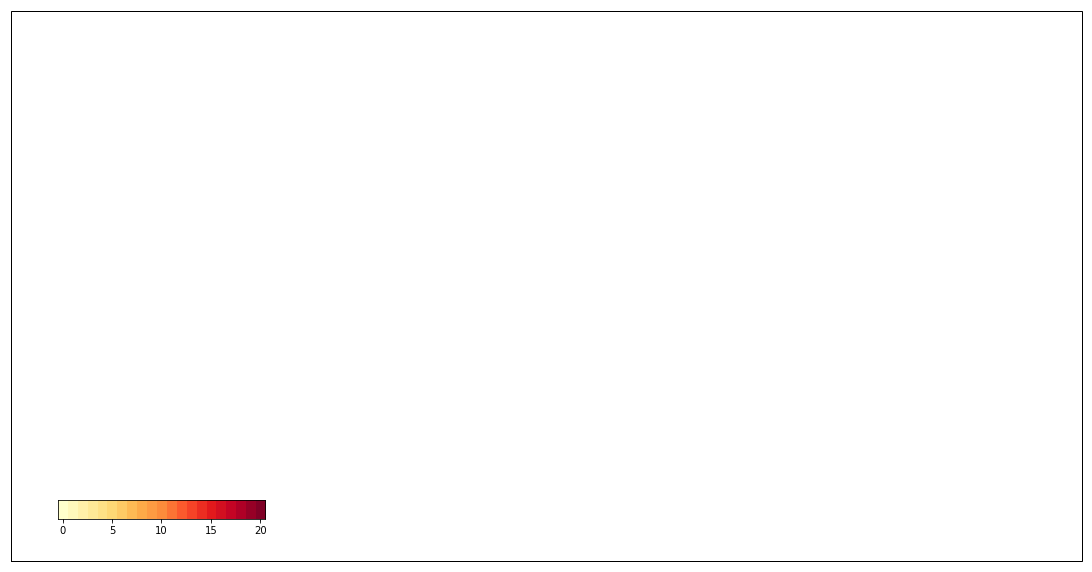

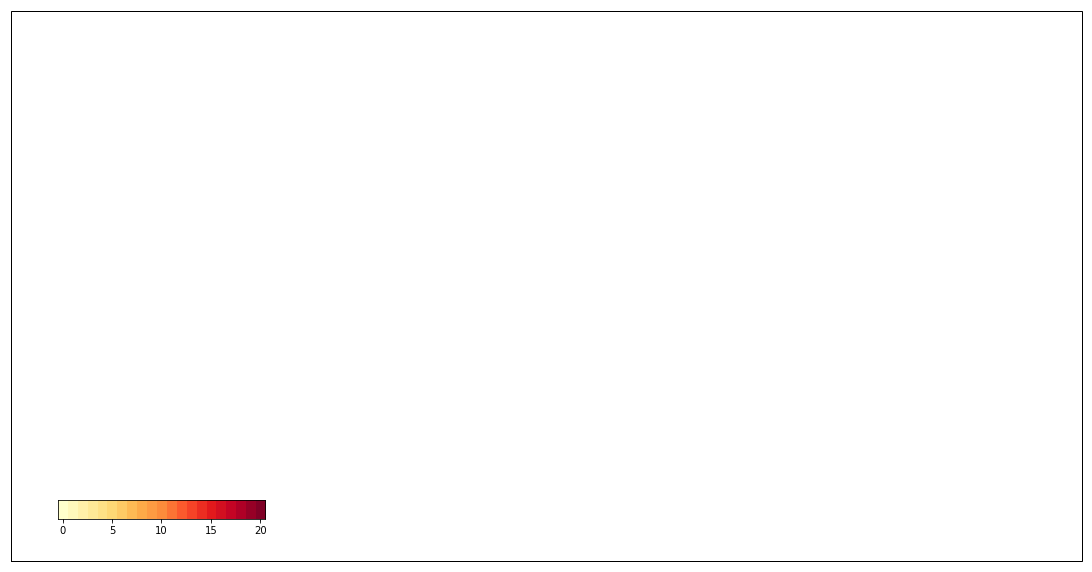

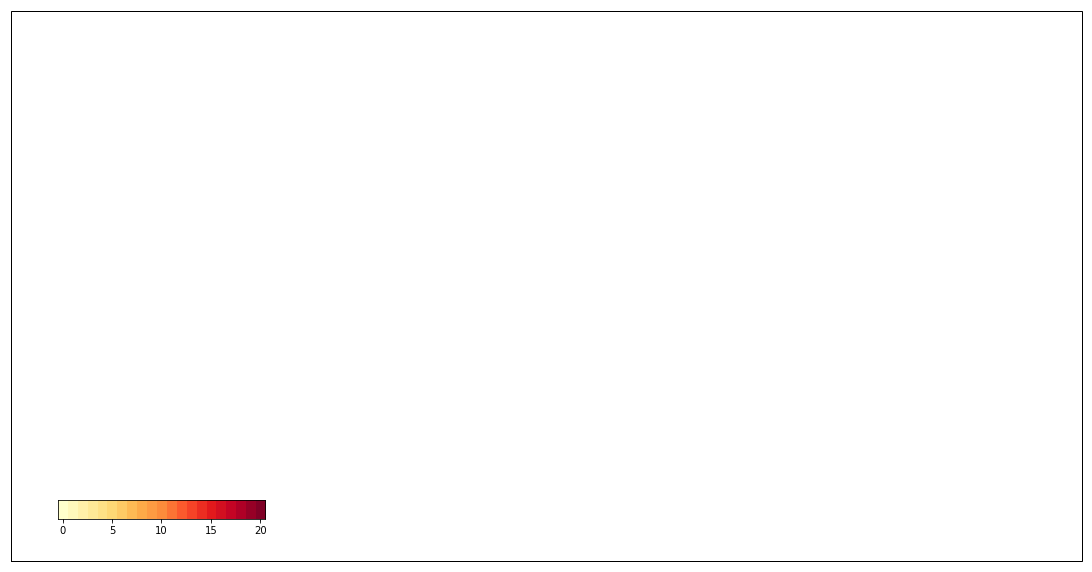

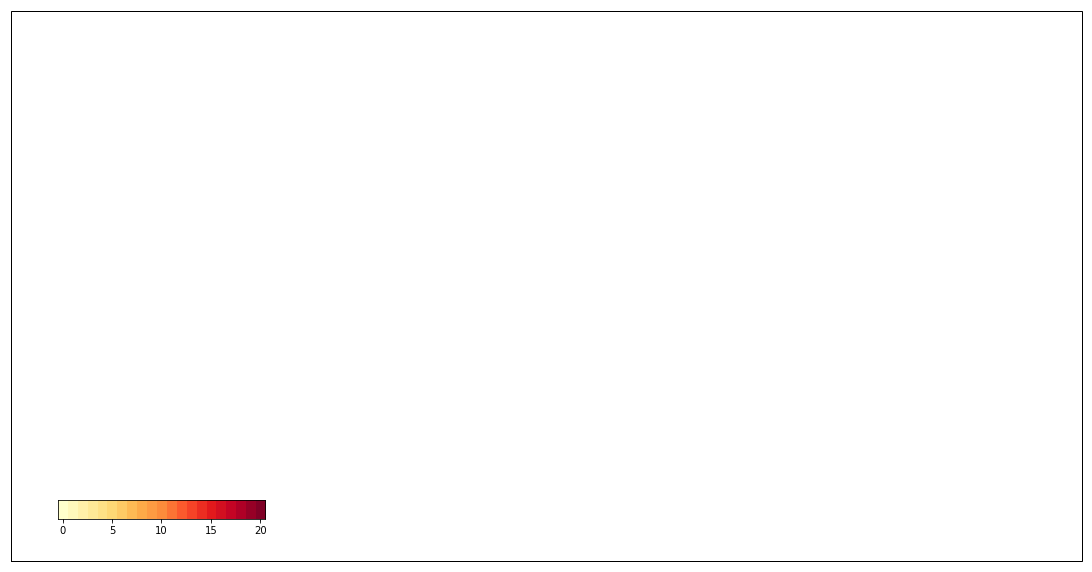

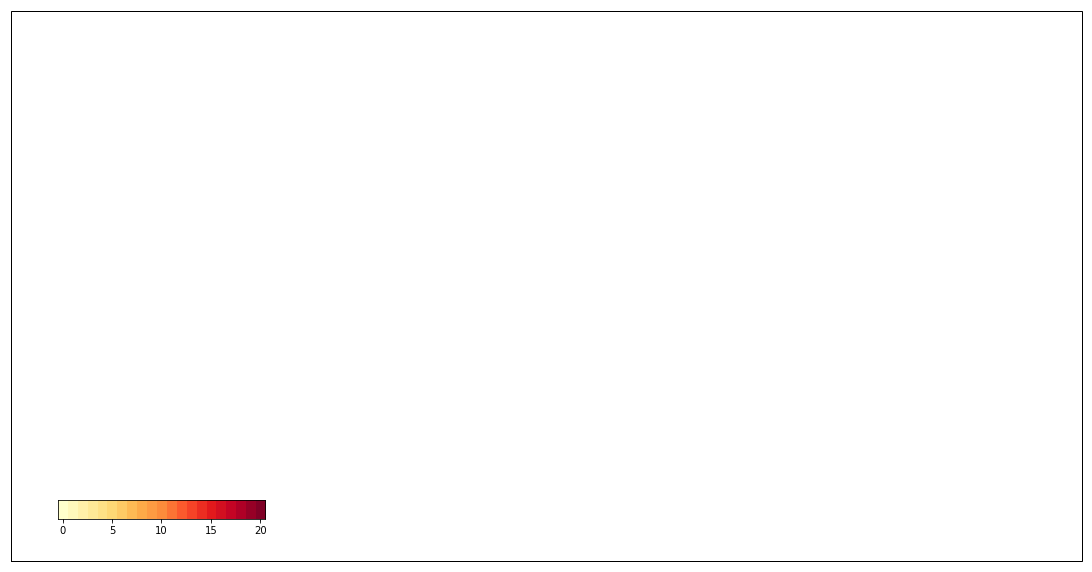

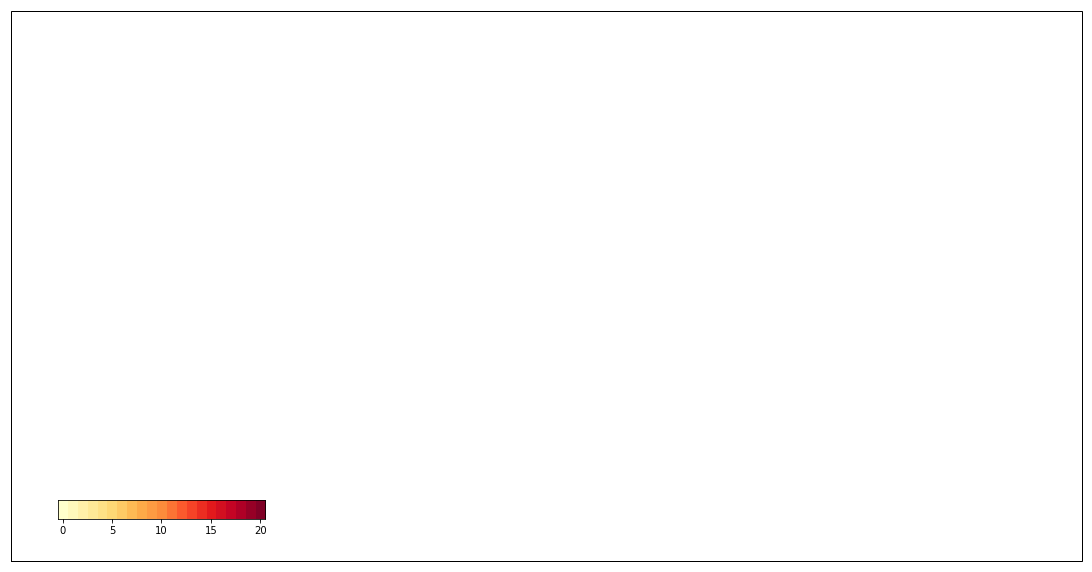

In [69]:
#Generate all images

for year in range(len(years)):
    fig = plt.figure(figsize=(19.2, 10.8))
    ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,  
                                           min_latitude=-65,
                                           max_latitude=70))

    #Set as backgorund the NASA digital image of the earth from Blue Marble
    ax.background_img(name='ne_shaded', resolution='low')
    ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())

    cmap = plt.cm.YlOrRd
    
    df.iloc[:, year+1] = pd.to_numeric(df.iloc[:, year+1])
    
    norm = matplotlib.colors.Normalize(vmin=min(df_min_max.min()), vmax=max(df_min_max.max()))

    for row in df.itertuples(index=False):
        ax.scatter(row[-1], row[-2], s=row[year+1]*5,
                   color=cmap(norm(row[year+1])), alpha=0.8,
                   transform=ccrs.PlateCarree())


    fontname = 'Open Sans'
    fontsize = 28

    #create color gradient
    m = np.zeros((1,21))
    for i in range(21):
        if i == 20:
            m[0,i] = 100
        m[0,i] = (i*5)/100.0

    ax2 = plt.axes([0.159, 0.14, 0.15, 0.15])
    ax2.imshow(m, cmap='YlOrRd', aspect=2)
    ax2.set_yticks(np.arange(0))
    ax2.set_xticks(np.arange(0,25,5), [0,25,50,75,100])
    #ax2.tick_params(length=6, width=2, colors='white',
                   #grid_color='white', grid_alpha=0.5)


    # Positions for the date and grad counter
    date_x = -150
    date_y = -50
    date_spacing = 65

    # Date text
    ax.text(date_x, date_y, 
            "CO2 "+str(years[year]),
            color='white',
            fontname=fontname, fontsize=fontsize*1.3,
            transform=ccrs.PlateCarree())

    #plt.show()
    fig.savefig(str(years[year])+".png", dpi=100,     
                frameon=False, facecolor='black')
    ax.clear()
